## Lead Scoring Case Study

### Problem Statement

An X Education Company sells online courses to various industry professionals which they market via multiple channels. People land to the website, browse the courses, fills up the form etc. Ones who provide the email address and phone numbers are considered a Lead. Now the lead conversion rate of the company is quite poor. 
The objective of assignment is to create a model to increase the target lead converation rate using supervised learning.


### Step 1: Importing  the Dataset

In [1]:
# Importing the required libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the datasets

lead = pd.read_csv("Leads.csv")

### Step 2: Inspecting the Dataframe

In [3]:
# Check the first few records of our dataset

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Check the rows and columns of the dataframe

lead.shape

(9240, 37)

In [5]:
# Check the statistical summary of the dataframe

lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Check the type of each column

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Exploratory Data Analysis

In [7]:
## Check the null values in the dataframe

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Observation: There are lot of missing values in our dataframe which needs to be dropped/handled accordingly.

Since the website form has 'Select' value in the drop down, we need to replace all the 'Select' values in the dataframe with null because they are not actual values, its the option that has not been selected by the users and is as good as null.

In [8]:
## Check the value of Select in entire dataframe

lead[lead == 'Select']

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Select,Select,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Select,Select,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Select,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Select,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
## Replace the Select values with null

for i in lead:
    lead[i] = lead[i].replace('Select', np.nan)

In [10]:
## Check the value of Select in entire dataframe

lead[lead == 'Select']

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Check the null values again as they would have increased for certain columns

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
# Check the null values of columns in percentage 

lead.isnull().sum() * 100 / lead.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Decision: We can drop the columns with more than 45% of the null values present in them. 

In [13]:
# Storing columns in pandas Series

s = lead.isnull().sum() * 100 / lead.shape[0]
cols = s[s > 45].index
cols

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [14]:
# Dropping all the columns with more than 45% of missing values

lead.drop(columns=cols, inplace=True)

In [15]:
# Check the rows and columns of the dataframe

lead.shape

(9240, 30)

In [16]:
#### Check the imbalance data percent

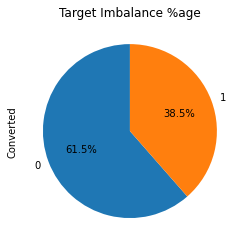

In [17]:
## Check for the imbalance percent of Target Variable - 'Convderted'

# lead.Converted.value_counts(normalize=True).plot.pie()
# plt.show()
lead.Converted.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Target Imbalance %age')
plt.ylabel('Converted')
plt.savefig('target_imbalance.png')
plt.show()

Analysing the categorical variables in the dataset to check for the distinct/missing values.

In [18]:
# Get the object columns from the dataframe

lead.select_dtypes(include='object').columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [19]:
## Check unique values of Prospect ID 

lead['Prospect ID'].unique

<bound method Series.unique of 0       7927b2df-8bba-4d29-b9a2-b6e0beafe620
1       2a272436-5132-4136-86fa-dcc88c88f482
2       8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3       0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4       3256f628-e534-4826-9d63-4a8b88782852
                        ...                 
9235    19d6451e-fcd6-407c-b83b-48e1af805ea9
9236    82a7005b-7196-4d56-95ce-a79f937a158d
9237    aac550fe-a586-452d-8d3c-f1b62c94e02c
9238    5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9
9239    571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Name: Prospect ID, Length: 9240, dtype: object>

In [20]:
## Check unique values of Lead Number

lead['Lead Number'].unique

<bound method Series.unique of 0       660737
1       660728
2       660727
3       660719
4       660681
         ...  
9235    579564
9236    579546
9237    579545
9238    579538
9239    579533
Name: Lead Number, Length: 9240, dtype: int64>

Observation: Prospect ID & Lead Number - Both are unique columns and duplicate, one of them can be removed. Lets analyse all the other categorical columns.

In [21]:
# Check the distinct values of 'Lead Origin column'

lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [22]:
# Check the distinct values of 'Lead Origin' column as normalized/percentage

lead['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

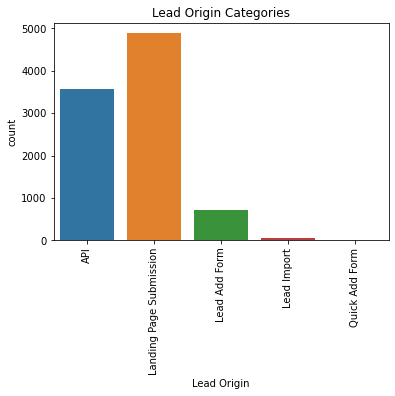

In [23]:
#plot the graph of percentage Lead Origin categories

#(lead['Lead Origin'].value_counts(normalize=True)*100).plot.barh()
#plt.title('Lead Origin Categories')
#plt.ylabel('Lead Origin')
#plt.show()

sns.countplot(x='Lead Origin', data=lead)
plt.title('Lead Origin Categories')
plt.xticks(rotation=90)
plt.show()

In [24]:
## Replace the lowest frequency value with the another Category - 'Others'

lead['Lead Origin'] = lead['Lead Origin'].replace(['Quick Add Form', 'Lead Import', 'Lead Add Form'], 'Others')

In [25]:
# Check the distinct values of 'Lead Origin' column again

lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Others                      774
Name: Lead Origin, dtype: int64

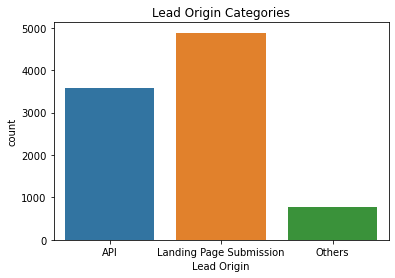

In [26]:
#plot the graph of percentage 'Lead Origin' categories

sns.countplot(x='Lead Origin', data=lead)
plt.title('Lead Origin Categories')
#plt.xticks(rotation=90)
plt.show()

Perform the same operation for other columns in the dataset 

In [27]:
# Check the distinct values of 'Lead Source' column

lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [28]:
# Check the distinct values of Lead Origin column as normalized/percentage

lead['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

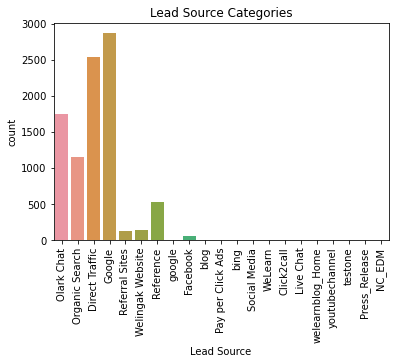

In [29]:
#plot the graph of percentage Lead Source categories

sns.countplot(x='Lead Source', data=lead)
plt.title('Lead Source Categories')
plt.xticks(rotation=90)
plt.show()

In [30]:
## Replace all the lowest frequency values with the category - Others as the percentage of frequent columns are close
## Aslo, replacing google with Google

lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['bing', 'Click2call', 'Social Media', 'Live Chat', 'Press_Release',
                                                  'WeLearn', 'Pay per Click Ads', 'welearnblog_Home', 'youtubechannel',
                                                  'testone', 'NC_EDM', 'blog', 'Facebook', 'Referral Sites', 
                                                   'Welingak Website', 'Reference'], 'Others')

In [31]:
# Check the Lead Source column again

lead['Lead Source'].value_counts()

Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Others             879
Name: Lead Source, dtype: int64

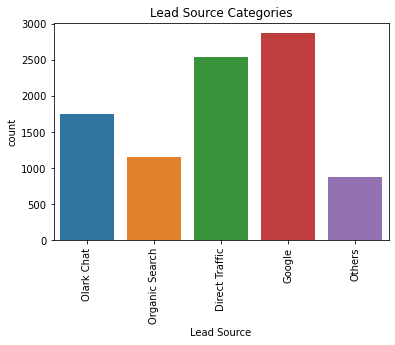

In [32]:
#plot the graph of percentage Lead Source categories

sns.countplot(x='Lead Source', data=lead)
plt.title('Lead Source Categories')
plt.xticks(rotation=90)
plt.show()

In [33]:
# Check the distinct values of Do Not Call column

lead['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

Observation: The values of this column does not have a proper distribution or is skewed hence it is better to drop the column. Lets check the distinct values for other columns too and take action accordingly.

In [34]:
# Check the distinct values of Do Not Email column

lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [35]:
# Check the distinct values of Do Not Email column as normalized

lead['Do Not Email'].value_counts(normalize=True)*100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

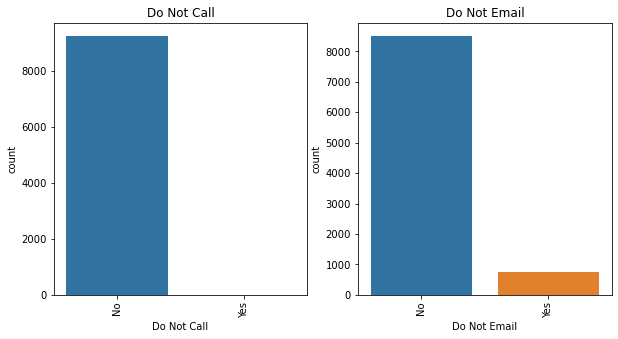

In [36]:
#plot the graph of percentage Do Not Call and Do Not Email

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.countplot(x='Do Not Call', data=lead)
plt.title('Do Not Call')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x='Do Not Email', data=lead)
plt.title('Do Not Email')
plt.xticks(rotation=90)
plt.show()

In [37]:
# Check the distinct values of Last Activity column

lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [38]:
# Check the distinct values of Last Activity column as normalized

lead['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

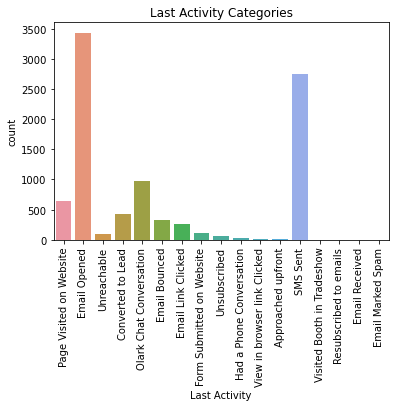

In [39]:
#plot the graph of Last Activity categories

sns.countplot(x='Last Activity', data=lead)
plt.title('Last Activity Categories')
plt.xticks(rotation=90)
plt.show()

In [40]:
## Most of the categories in Last Activity have very few records, so we can merge them into a single category

lead['Last Activity'] = lead['Last Activity'].replace(['Approached upfront', 'View in browser link Clicked', 'Email Received', 
                                                       'Email Marked Spam', 'Resubscribed to emails', 
                                                       'Had a Phone Conversation','Visited Booth in Tradeshow'], 'Others')

In [41]:
# Check the distinct values in Last Activity column again

lead['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Others                         51
Name: Last Activity, dtype: int64

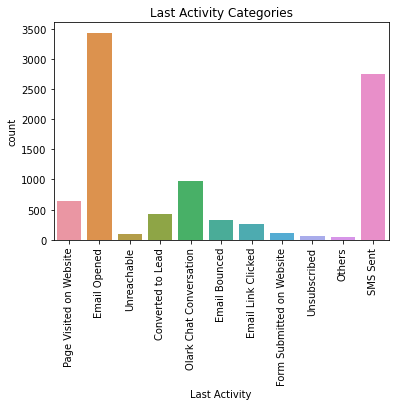

In [42]:
#plot the graph of Last Activity categories

sns.countplot(x='Last Activity', data=lead)
plt.title('Last Activity Categories')
plt.xticks(rotation=90)
plt.show()

In [43]:
# Check the distinct values in Country column

lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [44]:
# Check the distinct values in Country column as normalized

lead['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

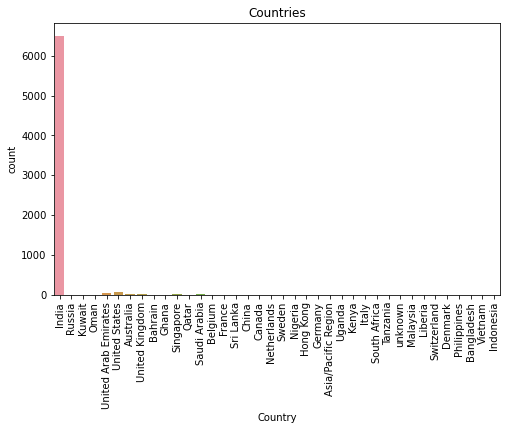

In [45]:
#plot the graph of Last Activity categories

plt.figure(figsize=[8,5])
sns.countplot(x='Country', data=lead)
plt.title('Countries')
plt.xticks(rotation=90)
plt.show()

Observation: Most of the categories in Country have very few records, so we can merge them into a single category

In [46]:
#lead['Country'].unique()
lead['Country'] = lead['Country'].replace([np.nan, 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
                                           'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
                                           'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
                                           'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
                                           'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
                                           'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
                                           'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
                                           'Vietnam', 'Indonesia'], 'Others')

In [47]:
# Check the distinct value of Country column again as normalized

lead['Country'].value_counts(normalize=True)*100

India     70.25974
Others    29.74026
Name: Country, dtype: float64

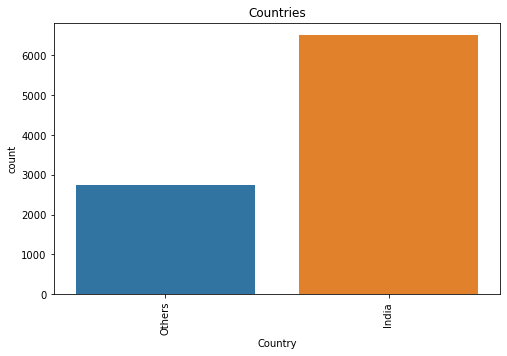

In [48]:
#plot the graph of Country

plt.figure(figsize=[8,5])
sns.countplot(x='Country', data=lead)
plt.title('Countries')
plt.xticks(rotation=90)
plt.show()

Observation: Even after merging all categories (except one) into one, the distribution of this column is skewed hence we will drop this column.

In [49]:
## Check for distinct values of Specialization 

lead.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [50]:
## Check for distinct values of Specialization as normalized

lead.Specialization.value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

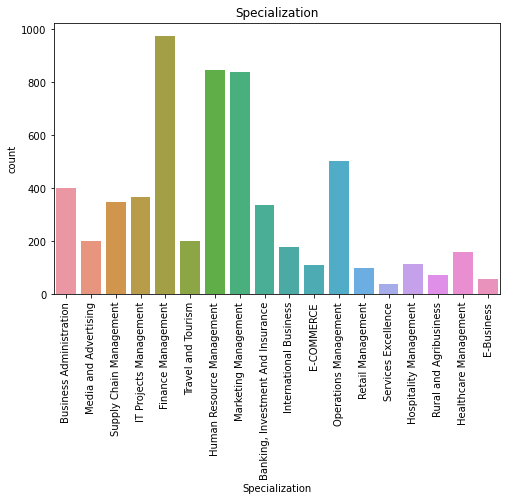

In [51]:
#plot the graph of Specialization categories

plt.figure(figsize=[8,5])
sns.countplot(x='Specialization', data=lead)
plt.title('Specialization')
plt.xticks(rotation=90)
plt.show()

In [52]:
## Check for distinct values of Specialization 

lead.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [53]:
# Check for the distinct values in What is your current occupation column

lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [54]:
# Check for the distinct values in What is your current occupation column as normalized

lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

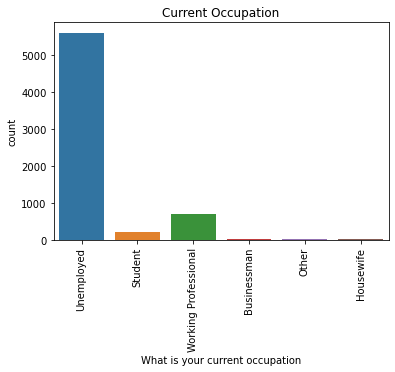

In [55]:
#plot the graph of What is your current occupation categories

sns.countplot(x='What is your current occupation', data=lead)
plt.title('Current Occupation')
plt.xticks(rotation=90)
plt.show()

In [56]:
## Creating another category for less frequent columns - we cannot merge it in Unemployed class 
## as they are actually not unemployed in business/functional terms

lead['What is your current occupation'] = lead['What is your current occupation'].replace(['Housewife', 'Businessman', 'Other'], 'Others')

In [57]:
# Check for the distinct values in What is your current occupation column again

lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Others                    34
Name: What is your current occupation, dtype: int64

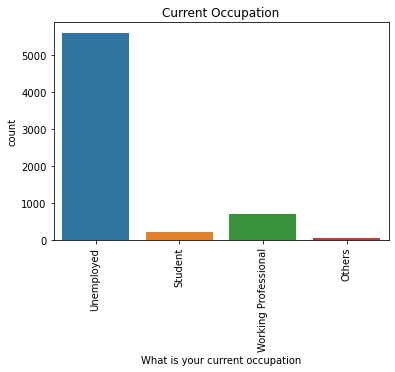

In [58]:
#plot the graph of What is your current occupation categories

sns.countplot(x='What is your current occupation', data=lead)
plt.title('Current Occupation')
plt.xticks(rotation=90)
plt.show()

In [59]:
# Check for the distinct values in What matters most to you in choosing a course column

lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [60]:
# Check for the distinct values in What matters most to you in choosing a course column as normalized

lead['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

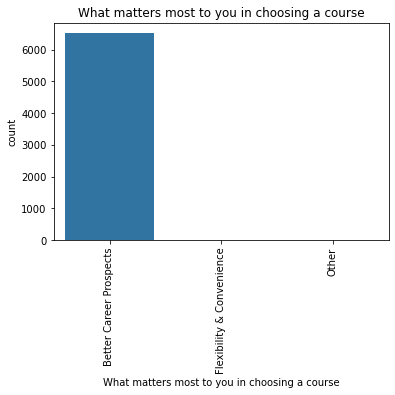

In [61]:
#plot the graph of What matters most to you in choosing a course categories

sns.countplot(x='What matters most to you in choosing a course', data=lead)
plt.title('What matters most to you in choosing a course')
plt.xticks(rotation=90)
plt.show()

Observation: Since 99% of the column belong to only single category hence it is better to drop this column.

In [62]:
## Check for Search Types

lead.Search.value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [63]:
## Check for Magazine Types

lead.Magazine.value_counts()

No    9240
Name: Magazine, dtype: int64

In [64]:
## Check for Newspaper Article Types

lead['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [65]:
## Check for Newspaper Types

lead.Newspaper.value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [66]:
## Check for X Education Forums Types

lead['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [67]:
## Check for Digital Advertisement Types

lead['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [68]:
## Check for Through Recommendations Types

lead['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [69]:
## Check for Receive More Updates About Our Courses Types

lead['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

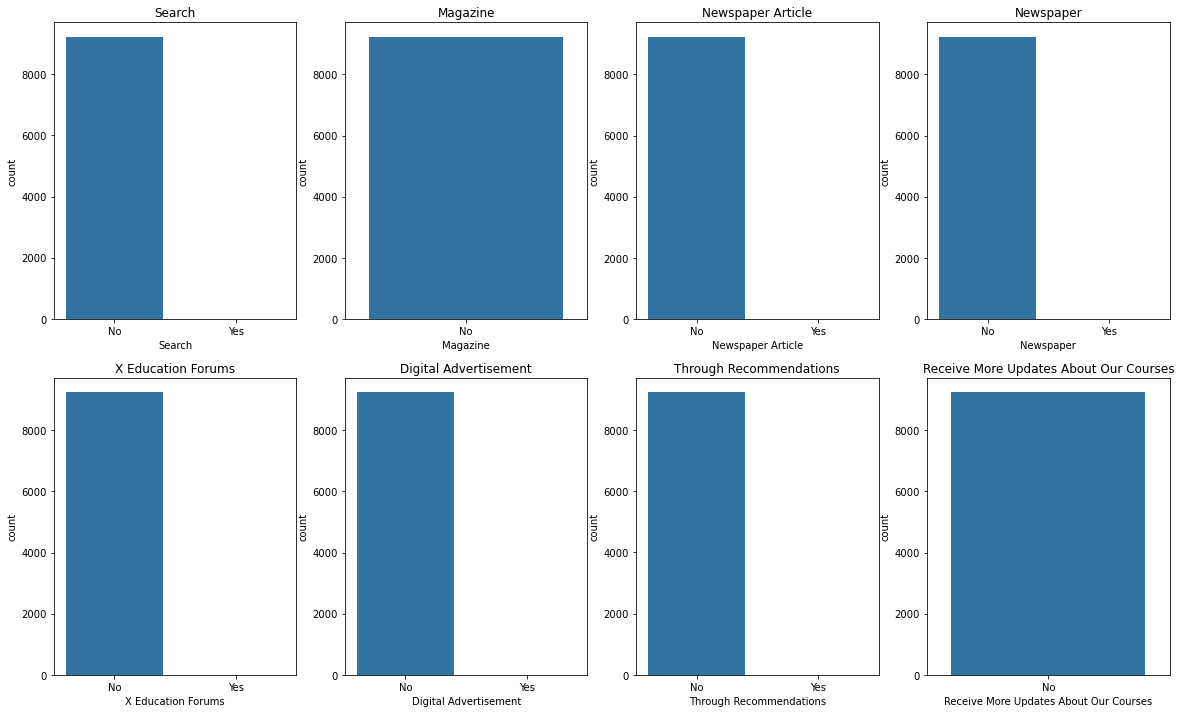

In [70]:
#plot the subplots

plt.figure(figsize=[20,12])
plt.subplot(2,4,1)
sns.countplot(x='Search', data=lead)
plt.title('Search')
#plt.xticks(rotation=90)
plt.subplot(2,4,2)
sns.countplot(x='Magazine', data=lead)
plt.title('Magazine')
#plt.xticks(rotation=90)
plt.subplot(2,4,3)
sns.countplot(x='Newspaper Article', data=lead)
plt.title('Newspaper Article')
#plt.xticks(rotation=90)
plt.subplot(2,4,4)
sns.countplot(x='Newspaper', data=lead)
plt.title('Newspaper')
#plt.xticks(rotation=90)
plt.subplot(2,4,5)
sns.countplot(x='X Education Forums', data=lead)
plt.title('X Education Forums')
#plt.xticks(rotation=90)
plt.subplot(2,4,6)
sns.countplot(x='Digital Advertisement', data=lead)
plt.title('Digital Advertisement')
#plt.xticks(rotation=90)
plt.subplot(2,4,7)
sns.countplot(x='Through Recommendations', data=lead)
plt.title('Through Recommendations')
#plt.xticks(rotation=90)
plt.subplot(2,4,8)
sns.countplot(x='Receive More Updates About Our Courses', data=lead)
plt.title('Receive More Updates About Our Courses')
#plt.xticks(rotation=90)
plt.show()

In [71]:
## Check for distinct values of Tags 

lead['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [72]:
## Check for distinct values of Tags as normalized

lead['Tags'].value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

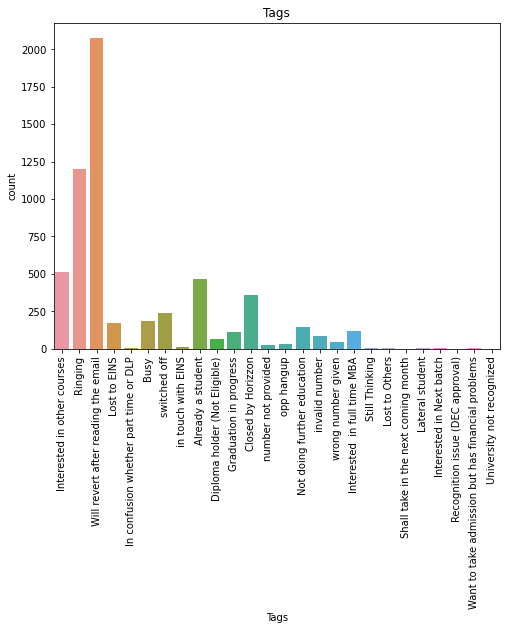

In [73]:
#plot the graph of Tags categories

plt.figure(figsize=[8,6])
sns.countplot(x='Tags', data=lead)
plt.title('Tags')
plt.xticks(rotation=90)
plt.show()

In [74]:
## Most of the categories in Tags have very few records, so we can merge them into a single category Others

lead['Tags'] = lead['Tags'].replace(['Recognition issue (DEC approval)', 'University not recognized', 
                                     'Shall take in the next coming month', 'Lateral student', 'Interested in Next batch',
                                     'In confusion whether part time or DLP', 'Lost to Others',
                                     'Want to take admission but has financial problems', 'Still Thinking', 'Lost to Others'
                                     'in touch with EINS'], 'Others')

In [75]:
# Check for distinct values of Tags column again

lead.Tags.value_counts()

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
wrong number given                       47
Others                                   37
opp hangup                               33
number not provided                      27
in touch with EINS                       12
Name: Tags, dtype: int64

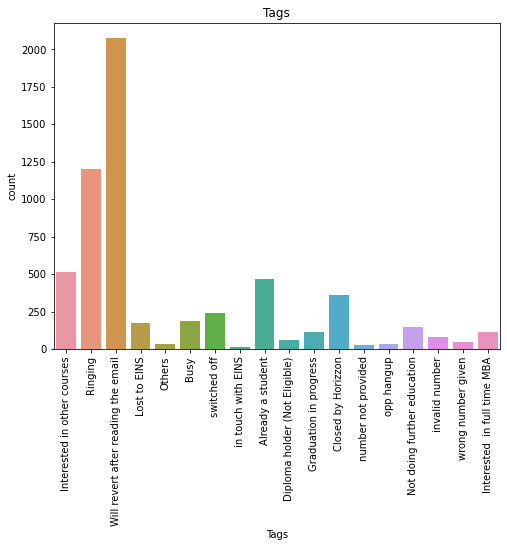

In [76]:
#plot the graph of Tags categories

plt.figure(figsize=[8,6])
sns.countplot(x='Tags', data=lead)
plt.title('Tags')
plt.xticks(rotation=90)
plt.show()

In [77]:
# Check for distinct values of Update me on Supply Chain Content column

lead['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [78]:
# Check for distinct values of Get updates on DM Content column

lead['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [79]:
# Check for distinct values of I agree to pay the amount through cheque column

lead['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [80]:
# Check for distinct values of A free copy of Mastering The Interview column

lead['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

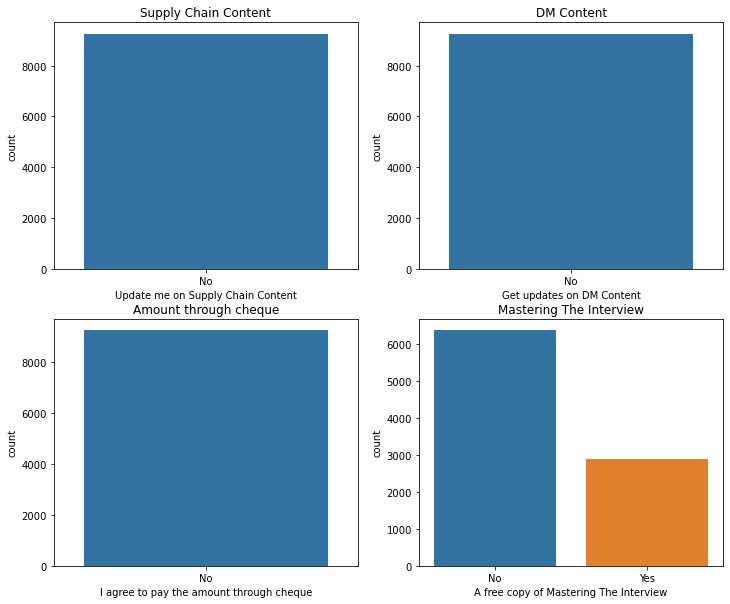

In [81]:
# Plot the graph of percentage Update me on Supply Chain Content, Get updates on DM Content, 
# I agree to pay the amount through cheque and A free copy of Mastering The Interview column

plt.figure(figsize=[12,10])
plt.subplot(2,2,1)
sns.countplot(x='Update me on Supply Chain Content', data=lead)
plt.title('Supply Chain Content')
#plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x='Get updates on DM Content', data=lead)
plt.title('DM Content')
#plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.countplot(x='I agree to pay the amount through cheque', data=lead)
plt.title('Amount through cheque')
#plt.xticks(rotation=90)
plt.subplot(2,2,4)
sns.countplot(x='A free copy of Mastering The Interview', data=lead)
plt.title('Mastering The Interview')
#plt.xticks(rotation=90)
plt.show()

In [82]:
# Check for distinct values of City

lead.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [83]:
# Check for distinct values of City as normalized

lead.City.value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

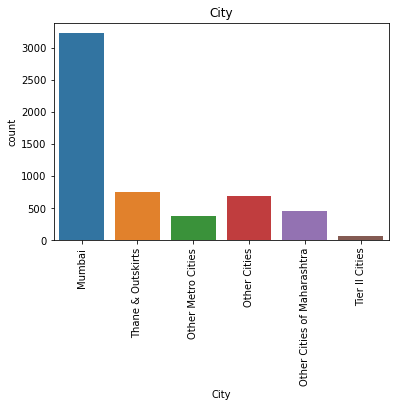

In [84]:
#plot the graph of City categories

#plt.figure(figsize=[8,6])
sns.countplot(x='City', data=lead)
plt.title('City')
plt.xticks(rotation=90)
plt.show()

In [85]:
# Check for distinct values of Last Notable Activity column

lead['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [86]:
# Check for distinct values of Last Notable Activity column as normalized

lead['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

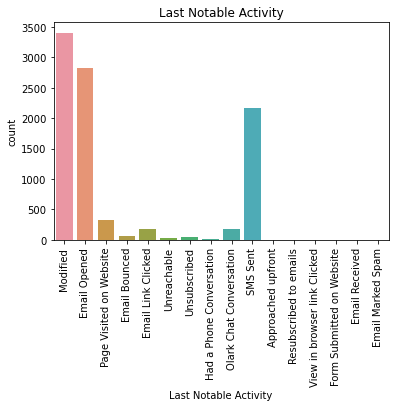

In [87]:
#plot the graph of Last Notable Activity categories

sns.countplot(x='Last Notable Activity', data=lead)
plt.title('Last Notable Activity')
plt.xticks(rotation=90)
plt.show()

In [88]:
## Most of the categories in Last Notable Activity have very few records, so we can merge them into a single category

lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Email Marked Spam', 'View in browser link Clicked', 
                                     'Resubscribed to emails', 'Email Received', 'Approached upfront', 
                                     'Had a Phone Conversation', 'Form Submitted on Website', 'Unreachable', 'Unsubscribed',
                                     'Email Bounced'], 'Others')

In [89]:
# Check the distinct values of Last Notable Activity again

lead['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

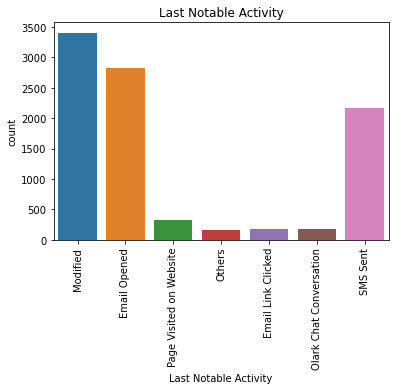

In [90]:
#plot the graph of Last Notable Activity categories

#plt.figure(figsize=[8,6])
sns.countplot(x='Last Notable Activity', data=lead)
plt.title('Last Notable Activity')
plt.xticks(rotation=90)
plt.show()

Decision: Dropping the columns to cleanse the dataset  
    1: Most data pertains to a single category <br>
    2: Duplciate column Prospect ID 

In [91]:
## Drop the columns where most of the data belongs to only category and duplicate column Prospect ID- Yes/No

lead.drop(columns=['Prospect ID', 'Country', 'What matters most to you in choosing a course', 'Search', 'Magazine',
                   'Newspaper Article', 'Newspaper', 'X Education Forums', 'Digital Advertisement', 'Through Recommendations', 
                   'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 
                   'I agree to pay the amount through cheque', 'Do Not Call'], inplace=True)

In [92]:
# Check the rows and columns of the dataframe 

lead.shape

(9240, 15)

In [93]:
# Check the missing values again

lead.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            3380
What is your current occupation           2690
Tags                                      3353
City                                      3669
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Validation: Now lets check the percentage of missing values in above columns (having missing values) to see if we can drop the column or records or impute some missing values.

We will first drop the records with less than 20% of missing values.

In [94]:
## Filter the records where missing values are less than 20 percent


for col in lead.columns:
    if (lead[col].isnull().value_counts(normalize=True)[False]*100 == 100) & ~(lead[col].isnull().value_counts(normalize=True)[False]*100 < 20):
        True
    elif ((lead[col].isnull().value_counts(normalize=True)[True]*100 > 0) & (lead[col].isnull().value_counts(normalize=True)[True]*100 < 20)):
        #print(col,'=', lead[col].isnull().value_counts(normalize=True)[True]*100)
        lead = lead[~(lead[col].isnull())]


In [95]:
#Check for the ros and columns of the dataframe again

lead.shape

(9074, 15)

In [96]:
# Check for the missing values again

lead.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            3282
What is your current occupation           2683
Tags                                      3327
City                                      3575
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [97]:
# Check for the missing values percentage of Specialization column

lead.Specialization.isnull().value_counts(normalize=True)*100

False    63.830725
True     36.169275
Name: Specialization, dtype: float64

In [98]:
# Check for the distinct values of Specialization

lead.Specialization.value_counts()

Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Travel and Tourism                   202
Media and Advertising                202
International Business               176
Healthcare Management                156
E-COMMERCE                           111
Hospitality Management               111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [99]:
## 36% of the value are null in the dataframe and since most of the categories are almost similar, hence 
##we will replace missing values with 'Others' category

lead['Specialization'] = lead.Specialization.replace(np.nan, 'Others')

In [100]:
# Check for the missing values percentage of Specialization column

lead.Specialization.isnull().sum()

0

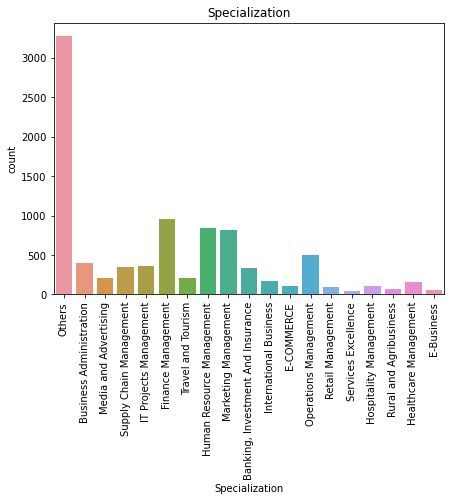

In [101]:
#plot the graph of Specialization categories

plt.figure(figsize=[7,5])
sns.countplot(x='Specialization', data=lead)
plt.title('Specialization')
plt.xticks(rotation=90)
plt.show()

In [102]:
# Check for the missing values percentage of What is your current occupation column

lead['What is your current occupation'].isnull().value_counts(normalize=True)*100

False    70.432004
True     29.567996
Name: What is your current occupation, dtype: float64

In [103]:
## Check distinct values in What is your current occupation column

lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.682992
Working Professional    10.593021
Student                  3.223283
Others                   0.500704
Name: What is your current occupation, dtype: float64

In [104]:
## As we can see 85% of the values belong to Unemployed class so we will impute missing values with Unemployed class

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

In [105]:
# Check for the missing values percentage of What is your current occupation column

lead['What is your current occupation'].isnull().sum()

0

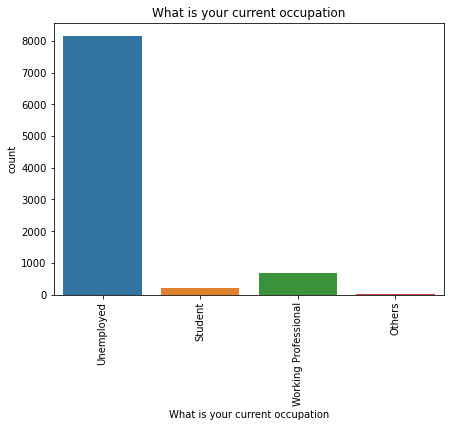

In [106]:
#plot the graph of What is your current occupation categories

plt.figure(figsize=[7,5])
sns.countplot(x='What is your current occupation', data=lead)
plt.title('What is your current occupation')
plt.xticks(rotation=90)
plt.show()

In [107]:
# Check for the missing values in Tags column

lead.Tags.value_counts(normalize=True)*100

Will revert after reading the email    35.079172
Ringing                                20.654254
Interested in other courses             8.856795
Already a student                       8.091178
Closed by Horizzon                      5.237515
switched off                            4.176092
Busy                                    3.219071
Lost to EINS                            2.992866
Not doing further education             2.523056
Interested  in full time MBA            2.018444
Graduation in progress                  1.931442
invalid number                          1.444232
Diploma holder (Not Eligible)           1.096224
wrong number given                      0.817818
Others                                  0.643814
opp hangup                              0.574213
number not provided                     0.435010
in touch with EINS                      0.208805
Name: Tags, dtype: float64

In [108]:
# Check for the missing values percentage of Tags column

lead.Tags.isnull().value_counts(normalize=True)*100

False    63.334803
True     36.665197
Name: Tags, dtype: float64

In [109]:
# Replace missing values with most frequent value

lead['Tags'] = lead.Tags.replace(np.nan, 'Will revert after reading the email')

In [110]:
# Check for the missing values percentage of Tags column again

lead.Tags.isnull().sum()

0

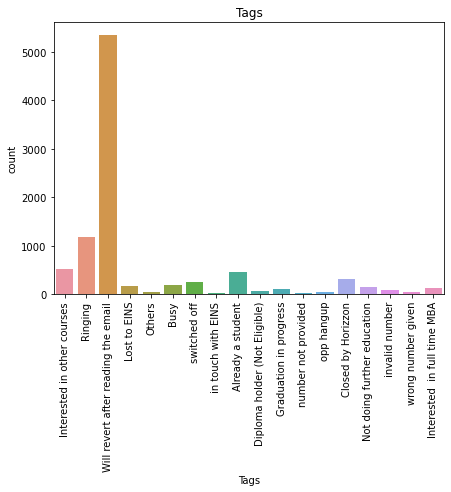

In [111]:
#plot the graph of Tags categories

plt.figure(figsize=[7,5])
sns.countplot(x='Tags', data=lead)
plt.title('Tags')
plt.xticks(rotation=90)
plt.show()

In [112]:
# Check for the missing values percentage of City column

lead.City.isnull().value_counts(normalize=True)*100

False    60.601719
True     39.398281
Name: City, dtype: float64

In [113]:
# Check for the distinct values of City column

lead.City.value_counts(normalize=True)*100

Mumbai                         57.774141
Thane & Outskirts              13.547918
Other Cities                   12.365885
Other Cities of Maharashtra     8.110566
Other Metro Cities              6.855792
Tier II Cities                  1.345699
Name: City, dtype: float64

In [114]:
## 57% belongs to Mumbai City hence imputing the missing values with the same

lead['City']=lead.City.replace(np.nan, 'Mumbai')

In [115]:
# Check for the missing values percentage of City column

lead.City.isnull().sum()

0

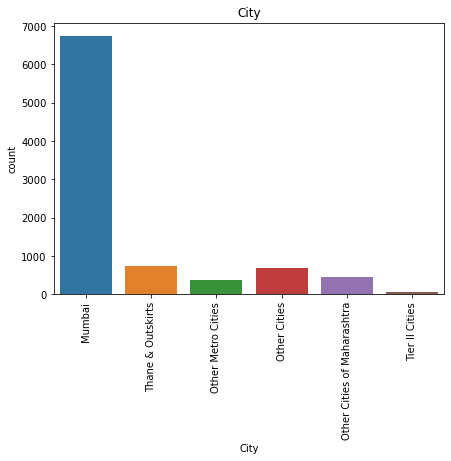

In [116]:
#plot the graph of City categories

plt.figure(figsize=[7,5])
sns.countplot(x='City', data=lead)
plt.title('City')
plt.xticks(rotation=90)
plt.show()

In [117]:
# Check the shape of the dataframe

lead.shape

(9074, 15)

In [118]:
# Check the missing values in dataframe again

lead.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### Now all the missing values have been removed/imputed and columns with high percent of missing values are dropped. Lets proceed to check if further cleaning is required.

In [119]:
# Check column wise info of the dataframe
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

In [120]:
## Check unique values in float column - TotaVisits
lead.TotalVisits.value_counts()

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [121]:
## Converting the float column TotalVisits to int as all the values are integer types

lead['TotalVisits'] = lead.TotalVisits.astype('int64')

In [122]:
## Check unique values in float column - Page Views Per Visit

lead['Page Views Per Visit'].value_counts()

0.00    2161
2.00    1794
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

Since few values are float type, hence datatype of this column is appropriate.

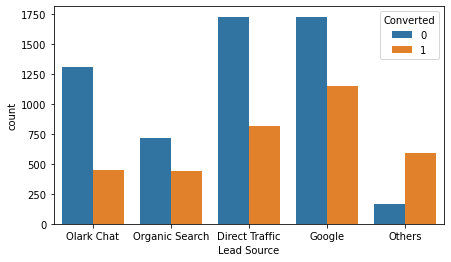

In [123]:
## Plot the graph of Lead Source vs Target Variable

plt.figure(figsize=[7,4])
sns.countplot(x='Lead Source', hue='Converted', data = lead)
plt.show()

#### Inference – Very few categories from the Lead Source gets converted to lead.

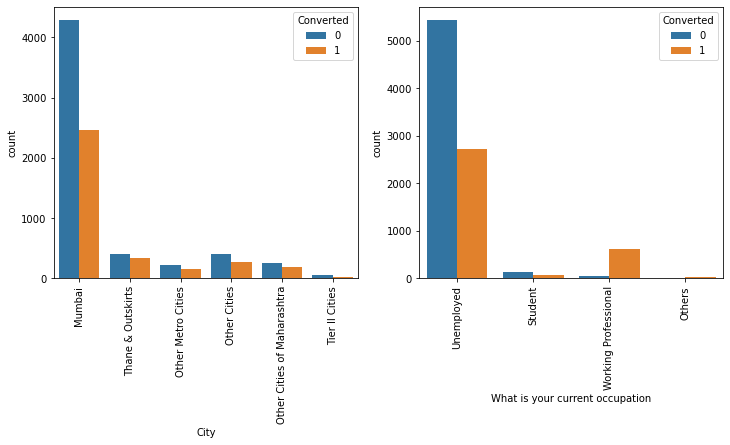

In [124]:
## Plot the graph of City & Occupation vs Target Variable

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
sns.countplot(x='City', hue='Converted', data = lead)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data = lead)
plt.xticks(rotation=90)
plt.show()

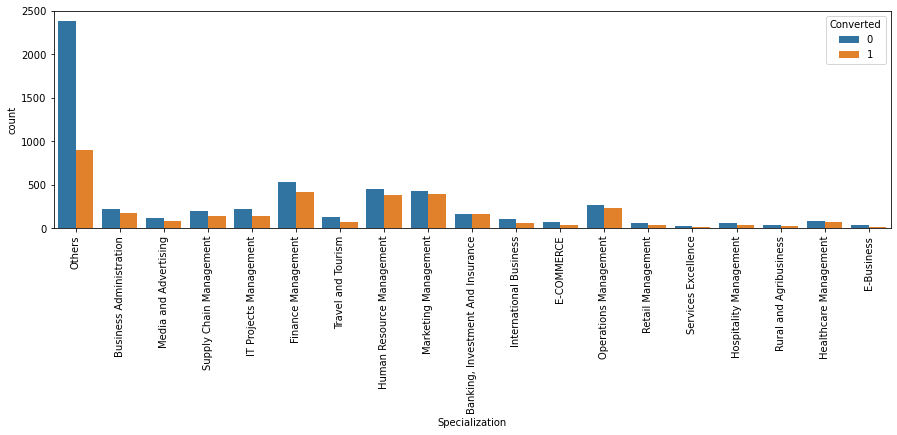

In [125]:
## Plot the graph of Specialization vs Target Variable

plt.figure(figsize=[15,4])
sns.countplot(x='Specialization', hue='Converted', data = lead)
plt.xticks(rotation=90)
plt.show()

In [126]:
# Check the percentage of rows retained

(lead.shape[0]/9240) * 100

98.2034632034632

#### Now, we will drop the Sales related column from the dataset and retain only the original dataset.

In [127]:
lead.drop(columns=['Tags', 'Last Activity', 'Last Notable Activity'], inplace=True)

In [128]:
# Check the rows and columns of the dataset

lead.shape

(9074, 12)

In [129]:
#Check for the first few rows of the dataframe

lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,0,0,0,0.0,Others,Unemployed,Mumbai,No
1,660728,API,Organic Search,No,0,5,674,2.5,Others,Unemployed,Mumbai,No
2,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2.0,Business Administration,Student,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1.0,Media and Advertising,Unemployed,Mumbai,No
4,660681,Landing Page Submission,Google,No,1,2,1428,1.0,Others,Unemployed,Mumbai,No


In [130]:
#Check for the column-wise info of the dataframe

lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   int64  
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  City                                    9074 non-null   obje

In [131]:
# Check the summary statistics of the dataset

lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


### Step 4: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [132]:
#Check for distinct values in Lead Source

lead['Lead Source'].astype('category').value_counts()

Google            2873
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Others             751
Name: Lead Source, dtype: int64

In [133]:
#Check for distinct values in Lead Origin

lead['Lead Origin'].astype('category').value_counts()

Landing Page Submission    4885
API                        3578
Others                      611
Name: Lead Origin, dtype: int64

In [134]:
#Check for distinct values in What is your current occupation

lead['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Others                    32
Name: What is your current occupation, dtype: int64

In [135]:
#Check for distinct values in Do Not Email

lead['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [136]:
#Get all the object columns

lead.select_dtypes(include=['object']).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [137]:
# List of variables to map

varlist = ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [138]:
# Check the first few rows of the dataframe

lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0,0,0.0,Others,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,0,5,674,2.5,Others,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Business Administration,Student,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Media and Advertising,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Others,Unemployed,Mumbai,0


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [139]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

varlist =  ['Lead Origin', 'Lead Source', 
            'Specialization', 'City', 
            'What is your current occupation']

dummy1 = pd.get_dummies(lead[varlist], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)
#lead.head()

In [140]:
# Check the first few rows of the dataframe

lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,API,Olark Chat,0,0,0,0,0.0,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
1,660728,API,Organic Search,0,0,5,674,2.5,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Business Administration,Student,...,0,0,0,0,0,0,0,1,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0


In [141]:
# Check for the missing values in the dataframe

lead.isnull().sum()

Lead Number                                             0
Lead Origin                                             0
Lead Source                                             0
Do Not Email                                            0
Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
Specialization                                          0
What is your current occupation                         0
City                                                    0
A free copy of Mastering The Interview                  0
Lead Origin_Landing Page Submission                     0
Lead Origin_Others                                      0
Lead Source_Google                                      0
Lead Source_Olark Chat                                  0
Lead Source_Organic Search                              0
Lead Source_Ot

#### Dropping the repeated variables

In [142]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(varlist, axis=1)

In [143]:
# Check the shape of the dataframe

lead.shape

(9074, 39)

In [144]:
#Check the column-wise info of the dataframe

lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9074 non-null   int64  
 1   Do Not Email                                          9074 non-null   int64  
 2   Converted                                             9074 non-null   int64  
 3   TotalVisits                                           9074 non-null   int64  
 4   Total Time Spent on Website                           9074 non-null   int64  
 5   Page Views Per Visit                                  9074 non-null   float64
 6   A free copy of Mastering The Interview                9074 non-null   int64  
 7   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 8   Lead Origin_Others                                    9074

In [145]:
# Check the missing values in the dataframe

lead.isnull().sum()

Lead Number                                             0
Do Not Email                                            0
Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
A free copy of Mastering The Interview                  0
Lead Origin_Landing Page Submission                     0
Lead Origin_Others                                      0
Lead Source_Google                                      0
Lead Source_Olark Chat                                  0
Lead Source_Organic Search                              0
Lead Source_Others                                      0
Specialization_Business Administration                  0
Specialization_E-Business                               0
Specialization_E-COMMERCE                               0
Specialization_Finance Management                       0
Specialization

Observation: Now we see that you have all variables as numeric and has no missing values.

#### Checking for Outliers

In [146]:
# Checking for outliers in the continuous variables

num_lead = lead.select_dtypes(include=['int64', 'float64'])

In [147]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.078907,0.378554,3.456028,482.887481,2.370151,0.318272
std,23348.029512,0.269608,0.485053,4.858802,545.256560,2.160871,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000
50%,615278.500000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000
75%,637176.500000,0.000000,1.000000,5.000000,922.750000,3.200000,1.000000
90%,650276.800000,0.000000,1.000000,7.000000,1373.000000,5.000000,1.000000
95%,655344.450000,1.000000,1.000000,10.000000,1557.000000,6.000000,1.000000
99%,659563.350000,1.000000,1.000000,17.000000,1839.000000,9.000000,1.000000


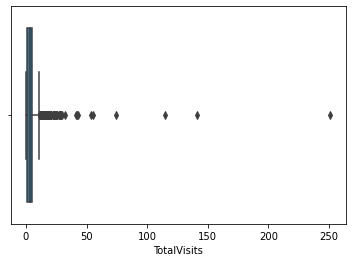

In [148]:
#plot the boxplot for TotalVisits column 

sns.boxplot(lead['TotalVisits'])
plt.show()

In [149]:
## We have outlier present in the dataset in TotalVisits, lets remove them based on quantiles

Q3 = lead.TotalVisits.quantile(0.99)
lead = lead[(lead.TotalVisits <= Q3)]
Q1 = lead.TotalVisits.quantile(0.01)
lead = lead[(lead.TotalVisits >= Q1)]

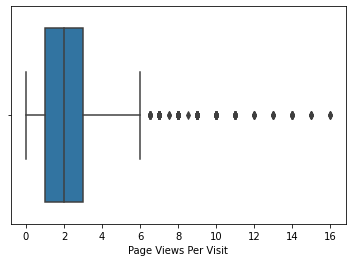

In [150]:
#plot the boxplot for Page Views Per Visit column 

sns.boxplot(lead['Page Views Per Visit'])
plt.show()

In [151]:
## We have outlier present in the dataset in Page Views Per Visit, lets remove them based on quantiles

Q3 = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[(lead['Page Views Per Visit'] <= Q3)]
Q1 = lead['Page Views Per Visit'].quantile(0.01)
lead = lead[(lead['Page Views Per Visit'] >= Q1)]

In [152]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99% again

lead.select_dtypes(include=['int64', 'float64']).describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,8924.000000,8924.000000,8924.000000,8924.000000,8924.000000,8924.00000,8924.000000
mean,617039.166853,0.077208,0.377521,3.153070,479.287875,2.27400,0.313537
std,23333.176791,0.266935,0.484794,2.903138,544.381711,1.89403,0.463956
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,596416.750000,0.000000,0.000000,1.000000,7.000000,1.00000,0.000000
50%,615405.500000,0.000000,0.000000,3.000000,242.000000,2.00000,0.000000
75%,637156.750000,0.000000,1.000000,5.000000,914.000000,3.00000,1.000000
90%,650235.900000,0.000000,1.000000,7.000000,1371.000000,5.00000,1.000000
95%,655280.400000,1.000000,1.000000,9.000000,1553.000000,6.00000,1.000000
99%,659560.390000,1.000000,1.000000,13.000000,1838.540000,8.00000,1.000000


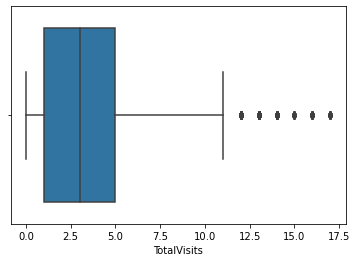

In [153]:
#plot the boxplot for TotalVisits column 

sns.boxplot(lead['TotalVisits'])
plt.show()

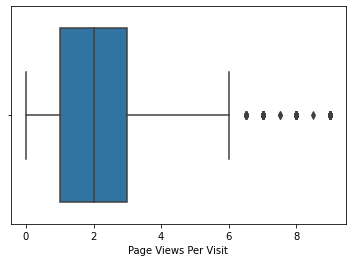

In [154]:
#plot the boxplot for Page Views Per Visit column 

sns.boxplot(lead['Page Views Per Visit'])
plt.show()

In [155]:
# Check the shape of the dataframe

lead.shape

(8924, 39)

Observation: From the distribution shown above, we can see that there no outliers in our data and the numbers are gradually increasing.

### Step 5: Test-Train Split

In [156]:
# Check the first few rows of the dataframe

lead.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,660728,0,0,5,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,660727,0,1,2,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,660719,0,0,1,305,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,660681,0,1,2,1428,1.0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [157]:
# Putting feature variable to X

X = lead.drop(['Lead Number','Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5,674,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,2,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2,1428,1.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [158]:
# Putting response variable to y

y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [159]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Feature Scaling

In [160]:
# Select the numerical features

X_train.select_dtypes(include=['int64','float64'])

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
6676,0,3,1247,3.0,0
6138,0,4,816,4.0,0
8650,0,3,1128,3.0,1
3423,0,0,0,0.0,0
6552,0,0,0,0.0,0
...,...,...,...,...,...
379,0,1,214,1.0,0
84,0,3,1136,3.0,0
8341,0,0,0,0.0,0
7191,0,2,1107,2.0,1


In [161]:
## Scaling the Train dataset using min-max Scaling

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
6676,0,-0.049636,1.395668,0.395289,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6138,0,0.297929,0.609686,0.926758,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8650,0,-0.049636,1.178657,0.395289,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3423,0,-1.092332,-0.878390,-1.199117,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6552,0,-1.092332,-0.878390,-1.199117,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [162]:
### Checking the Lead Conversion Rate

hot_lead = (sum(lead['Converted'])/len(lead['Converted'].index))*100
hot_lead

37.75212909009413

We have almost 38% potential lead conversion rate.

### Step 7: Looking at Correlations

In [163]:
# Check the correlation

df = lead.corr()
df

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
Lead Number,1.000000,-0.099000,0.024090,0.049582,0.019744,0.062228,-0.108551,-0.067006,0.042527,0.142506,...,-0.020266,-0.002355,0.005763,-0.003490,-0.024329,0.023950,-0.038054,-0.033702,0.031449,-0.013828
Do Not Email,-0.099000,1.000000,-0.138660,-0.014384,-0.046832,0.018377,0.056985,0.096680,-0.033433,-0.067903,...,0.004187,0.056589,0.008526,-0.003384,0.037984,-0.004224,0.044305,0.009367,0.039450,-0.048507
Converted,0.024090,-0.138660,1.000000,0.048199,0.356875,-0.002144,-0.033037,-0.038473,0.294689,0.029506,...,0.017434,-0.010197,0.012674,0.025732,0.010030,0.044444,-0.005637,-0.008739,-0.278573,0.315954
TotalVisits,0.049582,-0.014384,0.048199,1.000000,0.349512,0.720004,0.278293,0.432279,-0.270190,0.215372,...,0.063951,0.088491,0.089210,0.061730,0.064455,0.090664,0.019408,-0.032122,0.013904,-0.001292
Total Time Spent on Website,0.019744,-0.046832,0.356875,0.349512,1.000000,0.348433,0.177644,0.294281,-0.196115,0.220068,...,0.051273,0.040057,0.058165,0.066215,0.047405,0.077644,0.022931,-0.013624,-0.081093,0.094394
Page Views Per Visit,0.062228,0.018377,-0.002144,0.720004,0.348433,1.000000,0.288445,0.536631,-0.303817,0.253613,...,0.072192,0.106290,0.105270,0.086715,0.094880,0.089194,0.032356,-0.036728,0.024939,-0.009659
A free copy of Mastering The Interview,-0.108551,0.056985,-0.033037,0.278293,0.177644,0.288445,1.000000,0.563658,-0.166789,-0.326014,...,0.116439,0.122030,0.186420,0.111908,0.178129,0.044843,0.076748,-0.004290,0.002604,0.001378
Lead Origin_Landing Page Submission,-0.067006,0.096680,-0.038473,0.432279,0.294281,0.536631,0.563658,1.000000,-0.290128,0.082502,...,0.128753,0.109247,0.176209,0.153558,0.160724,0.156723,0.081689,0.000812,0.000940,-0.000259
Lead Origin_Others,0.042527,-0.033433,0.294689,-0.270190,-0.196115,-0.303817,-0.166789,-0.290128,1.000000,-0.184160,...,-0.023503,-0.036760,-0.043386,-0.018254,-0.046877,0.002683,-0.019465,0.006326,-0.170843,0.188608
Lead Source_Google,0.142506,-0.067903,0.029506,0.215372,0.220068,0.253613,-0.326014,0.082502,-0.184160,1.000000,...,-0.025963,-0.050404,-0.066664,-0.009052,-0.069175,0.064526,-0.037434,-0.033277,0.030052,-0.015303


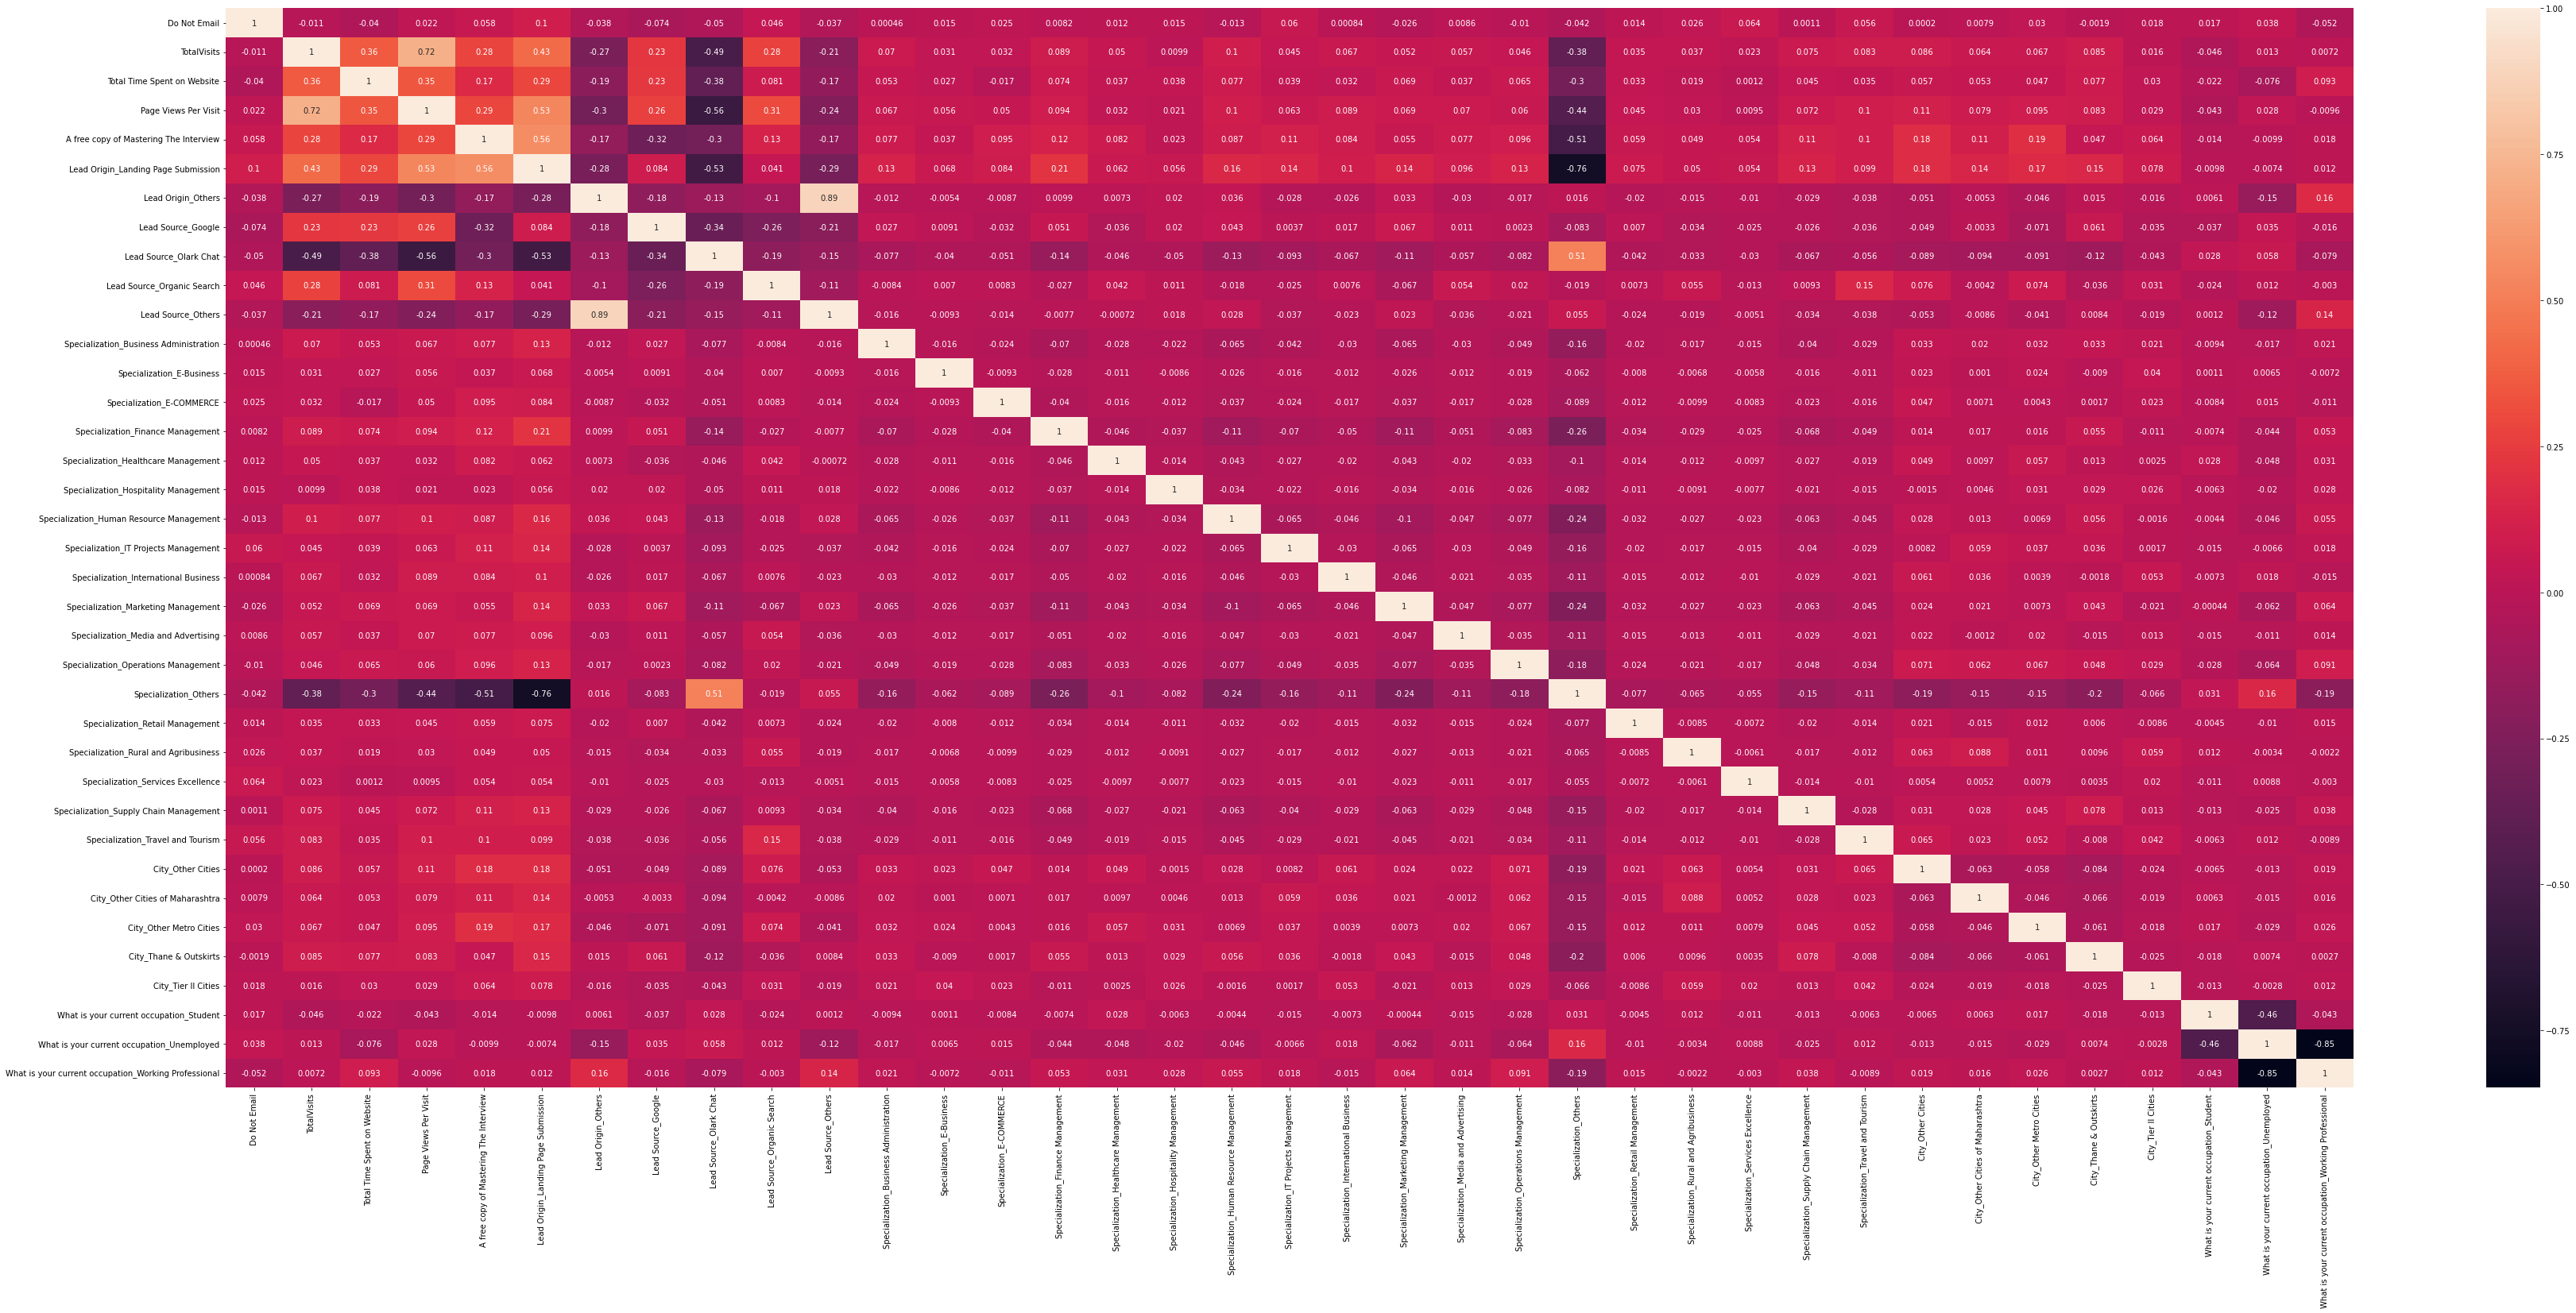

In [164]:
# Let's see the correlation matrix 

plt.figure(figsize = (60, 25))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [165]:
# Dropping highly correlated columns

X_test = X_test.drop(['Lead Origin_Others', 'What is your current occupation_Unemployed',], 1)
X_train = X_train.drop(['Lead Origin_Others', 'What is your current occupation_Unemployed'], 1)

In [166]:
# Check the shape of train dataset

X_train.shape

(6246, 35)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

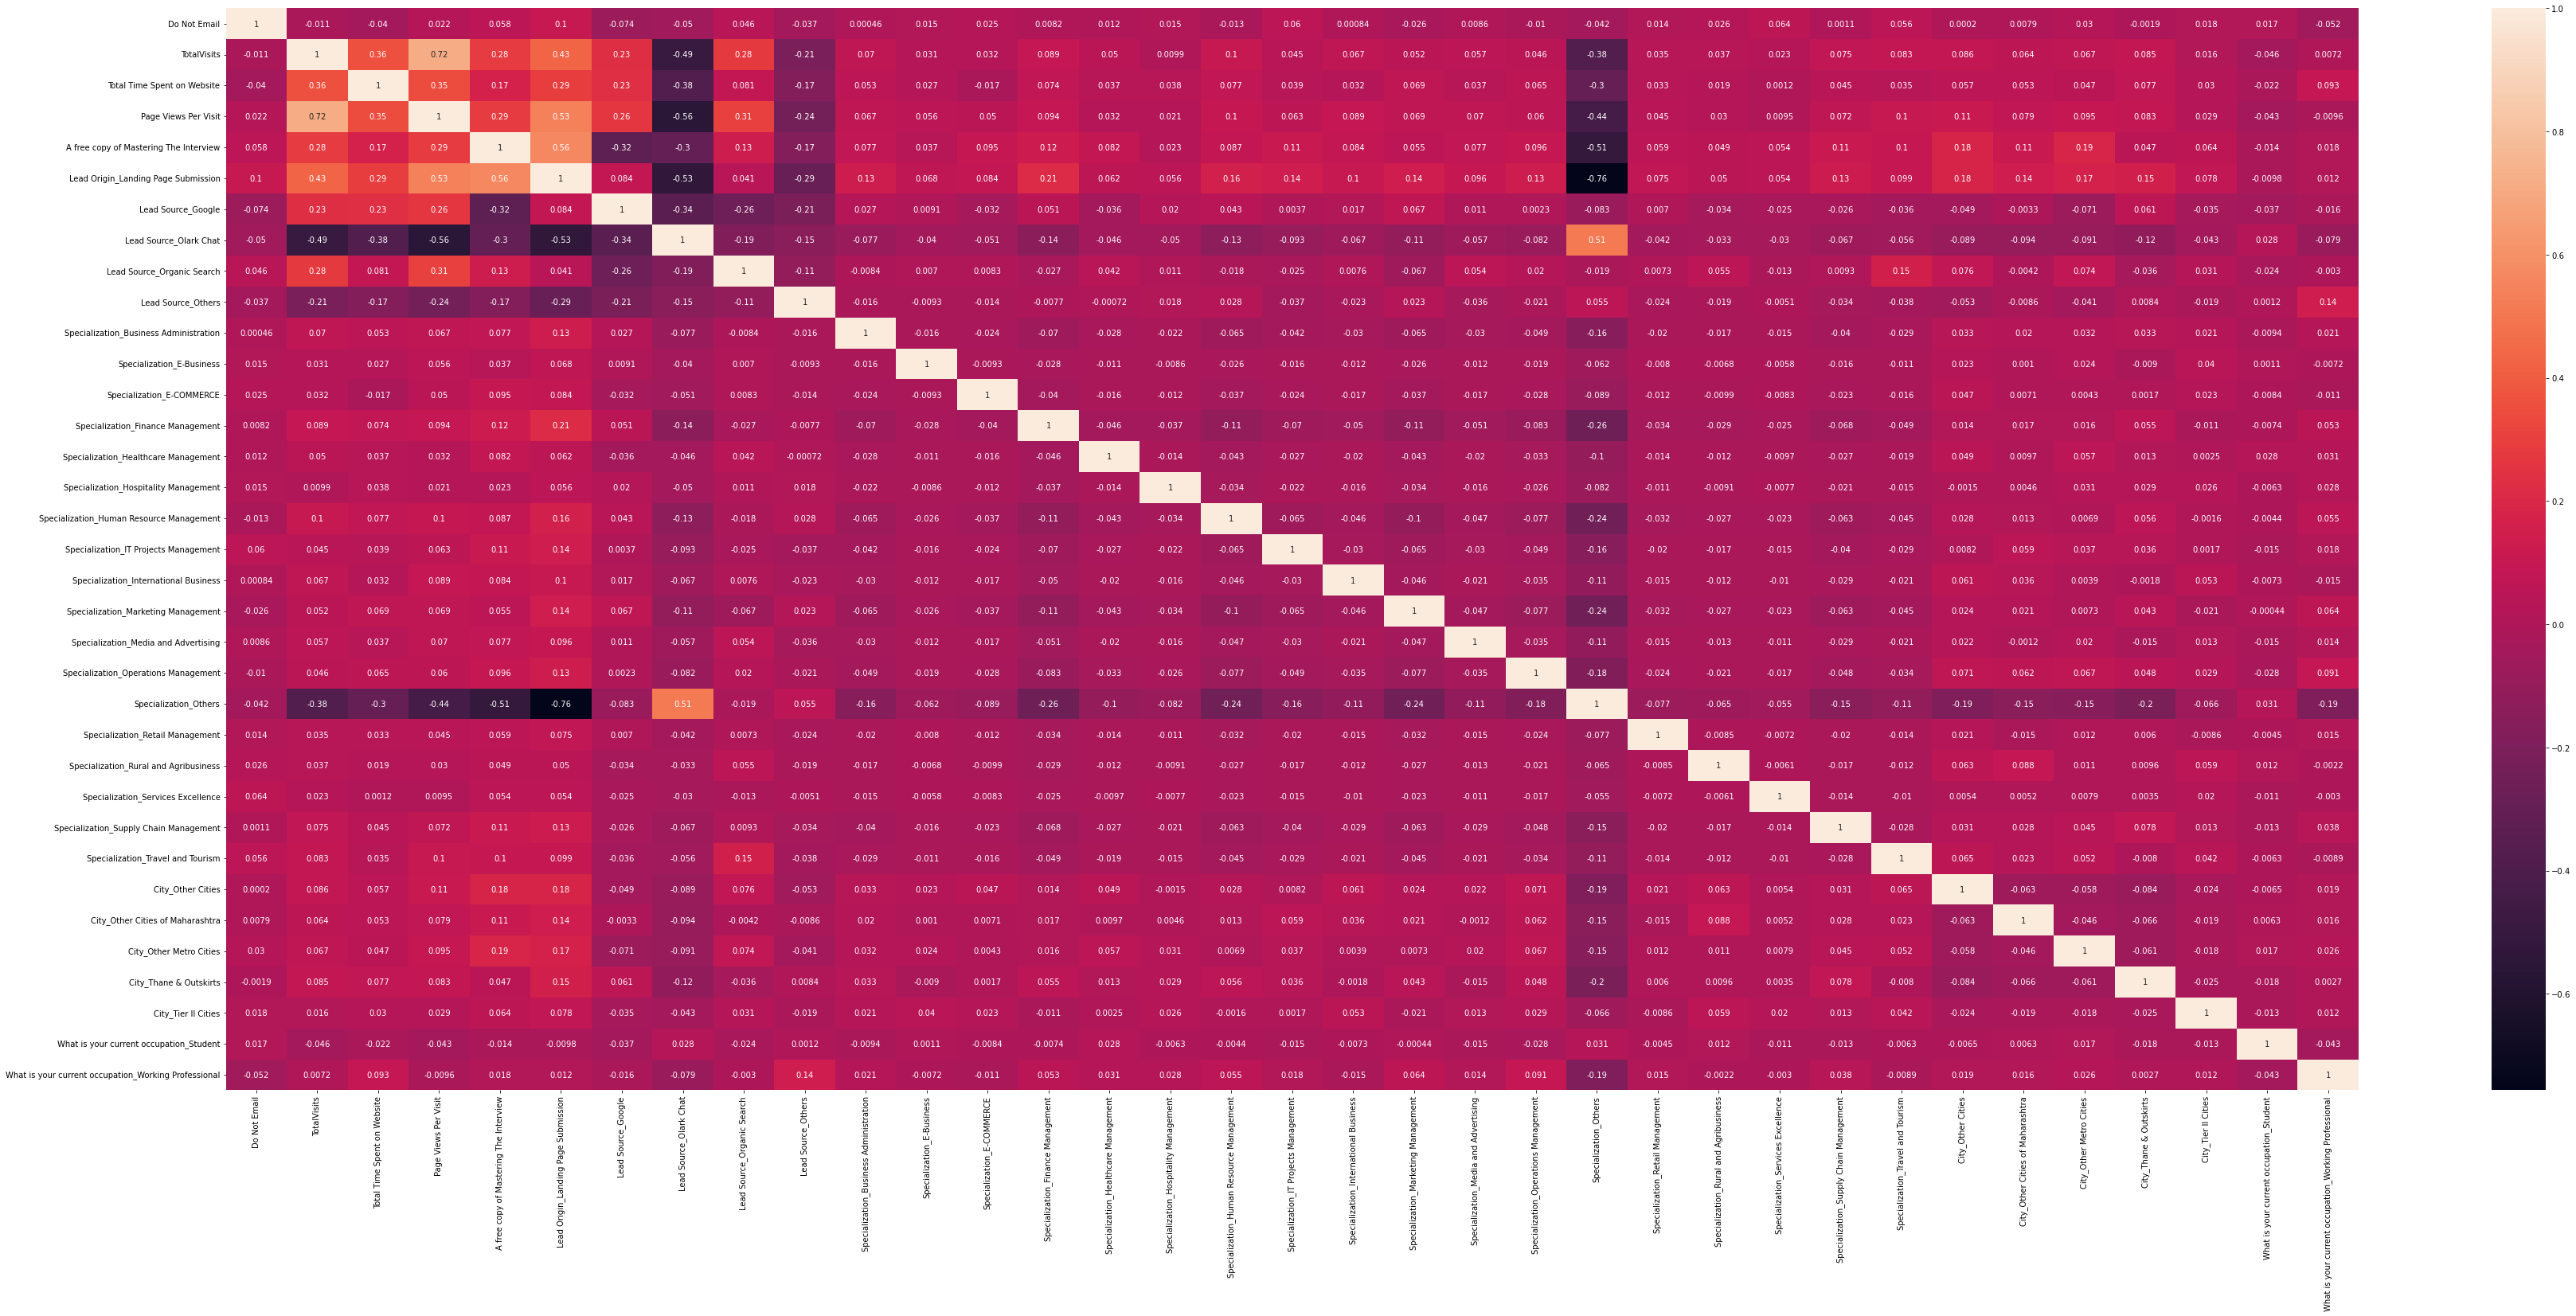

In [167]:
# Let's see the correlation matrix 

plt.figure(figsize = (60,25))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 8: Model Building  - Logisitc Regression
Let's start by splitting our data into a training set and a test set.

#### Step 8.1: Model 1 - Running Your First Training Model - with all features

In [168]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6210
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.8
Date:                Sat, 17 Sep 2022   Deviance:                       6043.6
Time:                        13:16:29   Pearson chi2:                 6.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0701      0.227      0.310      0.757      -0.374       0.514
Do Not Email                                            -1.3073      0.160     -8.180      0.000      -1.621      -0.994
TotalVisits                                              0.1398      0.046      3.028      0.002       0.049       0.230
Total Time Spent on Website                              1.0533      0.038     27.628      0.000       0.979       1.128
Page Views Per Visit                                    -0.2736      0.053     -5.144      0.000      -0.378      -0.169
A free copy of Mastering The Interview                  -0.1983      0.104     -1.907      0.056      -0.402       0.005
Lead Origin_Landing Page Submission                     -0.7681      0.126     -6.108      0.000      -1.015      -0.522
Lead Source_Google                                       0.2685      0.110      2.445      0.015       0.053       0.484
Lead Source_Olark Chat                                   0.7762      0.149      5.220      0.000       0.485       1.068
Lead Source_Organic Search                               0.3977      0.126      3.163      0.002       0.151       0.644
Lead Source_Others                                       2.6310      0.172     15.308      0.000       2.294       2.968
Specialization_Business Administration                  -0.3604      0.232     -1.554      0.120      -0.815       0.094
Specialization_E-Business                               -0.4141      0.426     -0.972      0.331      -1.249       0.421
Specialization_E-COMMERCE                               -0.3349      0.332     -1.009      0.313      -0.985       0.315
Specialization_Finance Management                       -0.4061      0.197     -2.066      0.039      -0.791      -0.021
Specialization_Healthcare Management                    -0.3391      0.294     -1.152      0.249      -0.916       0.238
Specialization_Hospitality Management                   -1.2553      0.354     -3.549      0.000      -1.949      -0.562
Specialization_Human Resource Management                -0.2948      0.199     -1.483      0.138      -0.684       0.095
Specialization_IT Projects Management                   -0.1010      0.234     -0.431      0.666      -0.560       0.358
Specialization_International Business                   -0.4683      0.280     -1.671      0.095      -1.018       0.081
Specialization_Marketing Management                     -0.2103      0.199     -1.057      0.290      -0.600       0.180
Specialization_Media and Advertising                    -0.2390      0.273     -0.876      0.381      -0.773       0.295
Specialization_Operations Management                    -0

#### Step 8.2: Feature Selection Using RFE

In [169]:
#Logistic Regression
logreg = LogisticRegression()

In [170]:
# running RFE with 15 variables as output

rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [171]:
# RFE selected columns

rfe.support_

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False,  True])

In [172]:
# Get the RFE selected columns and the ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', True, 1),
 ('Specialization_Business Administration', False, 10),
 ('Specialization_E-Business', False, 8),
 ('Specialization_E-COMMERCE', False, 12),
 ('Specialization_Finance Management', False, 6),
 ('Specialization_Healthcare Management', False, 13),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 14),
 ('Specialization_IT Projects Management', False, 2),
 ('Specialization_International Business', False, 4),
 ('Specialization_Marketing Management', False, 20),
 ('Specialization_Media and Advertising', False, 19),
 ('Specialization_Operations Management'

In [173]:
# Check the RFE selected columns

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [174]:
# Check the rest of the columns not selected by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'What is your current occupation_Student'],
      dtype='object')

#### Step 8.3: Model 2 - Running model with 15 features  

In [175]:
# Fit the regression model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3032.1
Date:                Sat, 17 Sep 2022   Deviance:                       6064.3
Time:                        13:16:30   Pearson chi2:                 6.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2696      0.140     -1.932      0.053      -0.543       0.004
Do Not Email                                            -1.3156      0.159     -8.260      0.000      -1.628      -1.003
Total Time Spent on Website                              1.0597      0.038     27.946      0.000       0.985       1.134
Page Views Per Visit                                    -0.1916      0.046     -4.149      0.000      -0.282      -0.101
Lead Origin_Landing Page Submission                     -0.8114      0.124     -6.534      0.000      -1.055      -0.568
Lead Source_Google                                       0.3737      0.091      4.124      0.000       0.196       0.551
Lead Source_Olark Chat                                   0.8045      0.140      5.744      0.000       0.530       1.079
Lead Source_Organic Search                               0.4571      0.122      3.749      0.000       0.218       0.696
Lead Source_Others                                       2.6819      0.163     16.421      0.000       2.362       3.002
Specialization_Hospitality Management                   -0.9727      0.312     -3.121      0.002      -1.584      -0.362
Specialization_Others                                   -1.2540      0.112    -11.214      0.000      -1.473      -1.035
Specialization_Retail Management                        -0.5879      0.350     -1.678      0.093      -1.275       0.099
Specialization_Services Excellence                      -0.2516      0.478     -0.526      0.599      -1.189       0.686
Specialization_Supply Chain Management                  -0.2172      0.172     -1.260      0.208      -0.555       0.121
Specialization_Travel and Tourism                       -0.3529      0.238     -1.484      0.138      -0.819       0.113
What is your current occupation_Working Professional     2.6109      0.180     14.469      0.000       2.257       2.965
========================================================================================================================
"""

Observation: p-value is insignificant for quite a few variables, we might need to drop them but first lets check the VIF's.

In [176]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.579886
6138    0.440588
8650    0.937217
3423    0.194611
6552    0.194611
1696    0.135710
2110    0.758121
6830    0.071932
2581    0.533292
5927    0.180997
dtype: float64

In [177]:
#Reshape the predicted train set
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.5798864 , 0.44058848, 0.93721736, 0.19461097, 0.19461097,
       0.13571015, 0.75812147, 0.07193204, 0.53329177, 0.18099731])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [178]:
# Creating the dataframe

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,1,0.579886,6676
1,1,0.440588,6138
2,1,0.937217,8650
3,0,0.194611,3423
4,0,0.194611,6552


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [179]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.579886,6676,1
1,1,0.440588,6138,0
2,1,0.937217,8650,1
3,0,0.194611,3423,0
4,0,0.194611,6552,0


In [180]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3344  527]
 [ 876 1499]]


In [181]:
# Predicted     not_converted    converted
# Actual
# not_converted        3344      527
# converted            876       1499

In [182]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7753762407941083


Observation: Model 2 accuracy: 77.537%

#### Checking VIFs

In [183]:
# Check for the VIF values of the feature variables. 

In [184]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.73
5,Lead Source_Olark Chat,2.51
2,Page Views Per Visit,1.99
3,Lead Origin_Landing Page Submission,1.88
4,Lead Source_Google,1.81
6,Lead Source_Organic Search,1.47
7,Lead Source_Others,1.31
1,Total Time Spent on Website,1.28
14,What is your current occupation_Working Profes...,1.15
0,Do Not Email,1.12


Observation: VIF is all good but p-value seems to be high for few variables, lets first drop Specialization_Services Excellence and re-create the model.

In [185]:
## Not being in our RFE

col = col.drop('Specialization_Services Excellence', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Specialization_Retail Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional'],
      dtype='object')

#### Step 8.3: Model 3 - Running model again post dropping columns with high P value

In [186]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3032.3
Date:                Sat, 17 Sep 2022   Deviance:                       6064.6
Time:                        13:16:30   Pearson chi2:                 6.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2725      0.139     -1.954      0.051      -0.546       0.001
Do Not Email                                            -1.3202      0.159     -8.300      0.000      -1.632      -1.008
Total Time Spent on Website                              1.0599      0.038     27.953      0.000       0.986       1.134
Page Views Per Visit                                    -0.1915      0.046     -4.146      0.000      -0.282      -0.101
Lead Origin_Landing Page Submission                     -0.8113      0.124     -6.533      0.000      -1.055      -0.568
Lead Source_Google                                       0.3751      0.091      4.141      0.000       0.198       0.553
Lead Source_Olark Chat                                   0.8056      0.140      5.753      0.000       0.531       1.080
Lead Source_Organic Search                               0.4585      0.122      3.760      0.000       0.220       0.698
Lead Source_Others                                       2.6826      0.163     16.425      0.000       2.362       3.003
Specialization_Hospitality Management                   -0.9708      0.312     -3.115      0.002      -1.582      -0.360
Specialization_Others                                   -1.2520      0.112    -11.204      0.000      -1.471      -1.033
Specialization_Retail Management                        -0.5857      0.350     -1.672      0.095      -1.272       0.101
Specialization_Supply Chain Management                  -0.2150      0.172     -1.248      0.212      -0.553       0.123
Specialization_Travel and Tourism                       -0.3508      0.238     -1.475      0.140      -0.817       0.115
What is your current occupation_Working Professional     2.6113      0.180     14.470      0.000       2.258       2.965
========================================================================================================================
"""

In [187]:
#Reshaping the predicted value series
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [188]:
y_train_pred[:10]

array([0.57927483, 0.44028529, 0.93709017, 0.19461303, 0.19461303,
       0.13487028, 0.75791729, 0.07144211, 0.53296843, 0.180766  ])

In [189]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [190]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.579275,6676,1
1,1,0.440285,6138,0
2,1,0.937090,8650,1
3,0,0.194613,3423,0
4,0,0.194613,6552,0


In [191]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7752161383285303


Observation: So overall the accuracy is almost the same. <br>
Model 3 accuracy: 77.521%

##### Let's check the VIFs again

In [192]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.73
5,Lead Source_Olark Chat,2.51
2,Page Views Per Visit,1.99
3,Lead Origin_Landing Page Submission,1.87
4,Lead Source_Google,1.81
6,Lead Source_Organic Search,1.47
7,Lead Source_Others,1.31
1,Total Time Spent on Website,1.28
13,What is your current occupation_Working Profes...,1.15
0,Do Not Email,1.11


In [193]:
# Let's drop Specialization_Supply Chain Management since it has a high p-value
col = col.drop('Specialization_Supply Chain Management')
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Specialization_Retail Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional'],
      dtype='object')

#### Step 8.4: Model 4 - Running model again post dropping columns with high P value

In [194]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3033.1
Date:                Sat, 17 Sep 2022   Deviance:                       6066.1
Time:                        13:16:30   Pearson chi2:                 6.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2905      0.139     -2.095      0.036      -0.562      -0.019
Do Not Email                                            -1.3185      0.159     -8.294      0.000      -1.630      -1.007
Total Time Spent on Website                              1.0597      0.038     27.954      0.000       0.985       1.134
Page Views Per Visit                                    -0.1918      0.046     -4.153      0.000      -0.282      -0.101
Lead Origin_Landing Page Submission                     -0.8092      0.124     -6.520      0.000      -1.052      -0.566
Lead Source_Google                                       0.3811      0.090      4.214      0.000       0.204       0.558
Lead Source_Olark Chat                                   0.8082      0.140      5.772      0.000       0.534       1.083
Lead Source_Organic Search                               0.4599      0.122      3.772      0.000       0.221       0.699
Lead Source_Others                                       2.6882      0.163     16.471      0.000       2.368       3.008
Specialization_Hospitality Management                   -0.9578      0.312     -3.075      0.002      -1.568      -0.347
Specialization_Others                                   -1.2381      0.111    -11.141      0.000      -1.456      -1.020
Specialization_Retail Management                        -0.5716      0.350     -1.633      0.103      -1.258       0.115
Specialization_Travel and Tourism                       -0.3366      0.238     -1.417      0.156      -0.802       0.129
What is your current occupation_Working Professional     2.6076      0.180     14.452      0.000       2.254       2.961
========================================================================================================================
"""

In [195]:
# Reshaping the data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [196]:
y_train_pred[:10]

array([0.57528933, 0.43775013, 0.93590292, 0.19447233, 0.19447233,
       0.13319093, 0.75543207, 0.07051174, 0.52931723, 0.17934266])

In [197]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [198]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.575289,6676,1
1,1,0.437750,6138,0
2,1,0.935903,8650,1
3,0,0.194472,3423,0
4,0,0.194472,6552,0


In [199]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7758565481908422


Observation: The accuracy is still practically the same. <br>
Model 4 accuracy: 77.585%

##### Let's now check the VIFs again

In [200]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.72
5,Lead Source_Olark Chat,2.51
2,Page Views Per Visit,1.99
3,Lead Origin_Landing Page Submission,1.82
4,Lead Source_Google,1.81
6,Lead Source_Organic Search,1.47
7,Lead Source_Others,1.31
1,Total Time Spent on Website,1.28
12,What is your current occupation_Working Profes...,1.15
0,Do Not Email,1.11


Decision: Lets drop Specialization_Travel and Tourism since it have high p-value and check the VIF again.

In [201]:
# Let's drop Specialization_Travel and Tourism since it has a high p-value
col = col.drop('Specialization_Travel and Tourism')
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Specialization_Retail Management',
       'What is your current occupation_Working Professional'],
      dtype='object')

#### Step 8.5: Re-sunning the model 4 post dropping columns with high P value

In [202]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3034.1
Date:                Sat, 17 Sep 2022   Deviance:                       6068.2
Time:                        13:16:30   Pearson chi2:                 6.34e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2921      0.139     -2.107      0.035      -0.564      -0.020
Do Not Email                                            -1.3305      0.159     -8.371      0.000      -1.642      -1.019
Total Time Spent on Website                              1.0590      0.038     27.954      0.000       0.985       1.133
Page Views Per Visit                                    -0.1926      0.046     -4.170      0.000      -0.283      -0.102
Lead Origin_Landing Page Submission                     -0.8132      0.124     -6.553      0.000      -1.056      -0.570
Lead Source_Google                                       0.3782      0.090      4.185      0.000       0.201       0.555
Lead Source_Olark Chat                                   0.7981      0.140      5.709      0.000       0.524       1.072
Lead Source_Organic Search                               0.4362      0.121      3.614      0.000       0.200       0.673
Lead Source_Others                                       2.6812      0.163     16.440      0.000       2.362       3.001
Specialization_Hospitality Management                   -0.9454      0.311     -3.035      0.002      -1.556      -0.335
Specialization_Others                                   -1.2278      0.111    -11.075      0.000      -1.445      -1.011
Specialization_Retail Management                        -0.5610      0.350     -1.602      0.109      -1.247       0.125
What is your current occupation_Working Professional     2.6105      0.180     14.471      0.000       2.257       2.964
========================================================================================================================
"""

In [203]:
#Reshaping
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [204]:
y_train_pred[:10]

array([0.57357931, 0.43536462, 0.93566512, 0.19448507, 0.19448507,
       0.13107397, 0.75440958, 0.06937191, 0.52190321, 0.17816898])

In [205]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [206]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.573579,6676,1
1,1,0.435365,6138,0
2,1,0.935665,8650,1
3,0,0.194485,3423,0
4,0,0.194485,6552,0


In [207]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7753762407941083


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [208]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.71
5,Lead Source_Olark Chat,2.50
2,Page Views Per Visit,1.99
3,Lead Origin_Landing Page Submission,1.81
4,Lead Source_Google,1.81
6,Lead Source_Organic Search,1.43
7,Lead Source_Others,1.31
1,Total Time Spent on Website,1.28
11,What is your current occupation_Working Profes...,1.15
0,Do Not Email,1.11


Lets now drop Specialization_Retail Management column and check the VIF

In [209]:
# Let's drop Specialization_Retail Management since it has a high p-value
col = col.drop('Specialization_Retail Management')
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Specialization_Hospitality Management',
       'Specialization_Others',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [210]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3035.4
Date:                Sat, 17 Sep 2022   Deviance:                       6070.8
Time:                        13:16:31   Pearson chi2:                 6.37e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2977      0.139     -2.148      0.032      -0.569      -0.026
Do Not Email                                            -1.3304      0.159     -8.378      0.000      -1.642      -1.019
Total Time Spent on Website                              1.0580      0.038     27.943      0.000       0.984       1.132
Page Views Per Visit                                    -0.1920      0.046     -4.158      0.000      -0.282      -0.101
Lead Origin_Landing Page Submission                     -0.8167      0.124     -6.580      0.000      -1.060      -0.573
Lead Source_Google                                       0.3795      0.090      4.200      0.000       0.202       0.557
Lead Source_Olark Chat                                   0.7988      0.140      5.714      0.000       0.525       1.073
Lead Source_Organic Search                               0.4372      0.121      3.623      0.000       0.201       0.674
Lead Source_Others                                       2.6832      0.163     16.455      0.000       2.364       3.003
Specialization_Hospitality Management                   -0.9372      0.311     -3.010      0.003      -1.548      -0.327
Specialization_Others                                   -1.2231      0.111    -11.033      0.000      -1.440      -1.006
What is your current occupation_Working Professional     2.6057      0.180     14.447      0.000       2.252       2.959
========================================================================================================================
"""

In [211]:
#Reshaping the data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [212]:
y_train_pred[:10]

array([0.57108414, 0.43344081, 0.9347684 , 0.19448342, 0.19448342,
       0.1300279 , 0.75223335, 0.06880776, 0.51969919, 0.17714088])

In [213]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [214]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.571084,6676,1
1,1,0.433441,6138,0
2,1,0.934768,8650,1
3,0,0.194483,3423,0
4,0,0.194483,6552,0


In [215]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7745757284662184


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [216]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.71
5,Lead Source_Olark Chat,2.50
2,Page Views Per Visit,1.99
4,Lead Source_Google,1.81
3,Lead Origin_Landing Page Submission,1.79
6,Lead Source_Organic Search,1.43
7,Lead Source_Others,1.31
1,Total Time Spent on Website,1.28
10,What is your current occupation_Working Profes...,1.14
0,Do Not Email,1.11


Decision: All variables have a good value of VIF. And p-values are also < 0.005. So we need not drop any more variables and we can proceed with making predictions using this model only

In [217]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3346,  525],
       [ 883, 1492]], dtype=int64)

In [218]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7745757284662184

Observation: Final Model accuracy: 77.457%

#### Step 8.5: Calculating other Metrics beyond 

In [219]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [220]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6282105263157894

In [221]:
# Let us calculate specificity
TN / float(TN+FP)

0.864376130198915

In [222]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.13562386980108498


In [223]:
# positive predictive value 
print (TP / float(TP+FP))

0.7397124442240952


In [224]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7912035942303145


#### Step 8.6: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [225]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [226]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

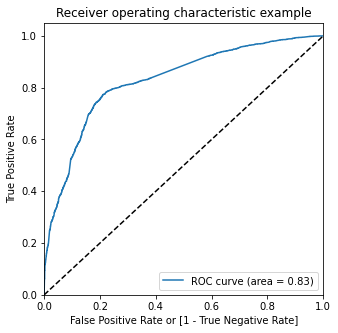

In [227]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Step 8.7: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [228]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.571084,6676,1,1,1,1,1,1,1,0,0,0,0
1,1,0.433441,6138,0,1,1,1,1,1,0,0,0,0,0
2,1,0.934768,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.194483,3423,0,1,1,0,0,0,0,0,0,0,0
4,0,0.194483,6552,0,1,1,0,0,0,0,0,0,0,0


In [229]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.443804  0.990737  0.108241
0.2   0.2  0.708774  0.831158  0.633686
0.3   0.3  0.780339  0.775579  0.783260
0.4   0.4  0.785783  0.722947  0.824335
0.5   0.5  0.774576  0.628211  0.864376
0.6   0.6  0.760006  0.534316  0.898476
0.7   0.7  0.730387  0.378526  0.946267
0.8   0.8  0.710855  0.280000  0.975200
0.9   0.9  0.675472  0.160421  0.991475


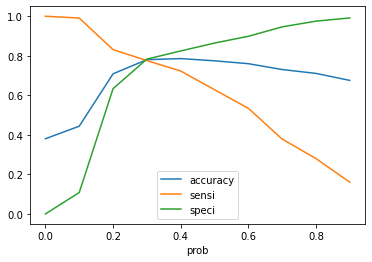

In [230]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Observation: From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [231]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.571084,6676,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.433441,6138,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.934768,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.194483,3423,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.194483,6552,0,1,1,0,0,0,0,0,0,0,0,0


In [232]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7803394172270253

In [233]:
# Lets check the Confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3032,  839],
       [ 533, 1842]], dtype=int64)

In [234]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [235]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.775578947368421

In [236]:
# Let us calculate specificity
TN / float(TN+FP)

0.7832601394988375

In [237]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.21673986050116248


In [238]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6870570682581126


In [239]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8504908835904629


## Precision and Recall

In [240]:
#Looking at the confusion matrix again

In [241]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3346,  525],
       [ 883, 1492]], dtype=int64)

##### Precision
TP / TP + FP

In [242]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7397124442240952

##### Recall
TP / TP + FN

In [243]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6282105263157894

In [244]:
#using sklearn 
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7397124442240952

In [245]:
#using sklearn
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6282105263157894

### Precision and recall tradeoff

In [246]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    1
 6242    1
 6243    0
 6244    0
 6245    0
 Name: Converted, Length: 6246, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6241    0
 6242    1
 6243    0
 6244    1
 6245    0
 Name: predicted, Length: 6246, dtype: int64)

In [247]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

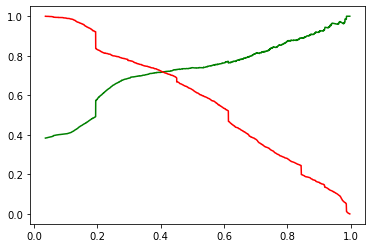

In [248]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Step 8.8: Making predictions on the test set

In [249]:
#Rescaling the test dataset

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [250]:
# Using the RFE selected columns 
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Working Professional
7625,0,2.145058,-0.164140,1,0,0,0,0,0,0,0
5207,0,0.772700,0.876565,1,0,0,0,0,0,0,0
2390,0,-0.885722,-1.204846,0,0,0,0,1,0,1,0
4362,0,-0.451952,-0.164140,1,1,0,0,0,0,0,0
1023,0,-0.293028,1.396918,1,0,0,0,0,0,0,0


In [251]:
#Adding constant in Statsmodel API
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [252]:
#Predictions on test set
y_test_pred = res.predict(X_test_sm)

In [253]:
y_test_pred[:10]

7625    0.766112
5207    0.385757
2390    0.612217
4362    0.234766
1023    0.155439
8226    0.835353
3079    0.175450
530     0.166112
7873    0.193443
5146    0.508567
dtype: float64

In [254]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [255]:
# Let's see the head
y_pred_1.head()

,0
7625,0.766112
5207,0.385757
2390,0.612217
4362,0.234766
1023,0.155439


In [256]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [257]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [258]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [259]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [260]:
#Check the shape of final predicted model
y_pred_final.head()

,Converted,Lead Number,0
0,0,7625,0.766112
1,1,5207,0.385757
2,1,2390,0.612217
3,0,4362,0.234766
4,0,1023,0.155439


In [261]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [262]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [263]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,7625,0,0.766112
1,5207,1,0.385757
2,2390,1,0.612217
3,4362,0,0.234766
4,1023,0,0.155439


In [264]:
# Cacculating the final predicted variable
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [265]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,7625,0,0.766112,1
1,5207,1,0.385757,1
2,2390,1,0.612217,1
3,4362,0,0.234766,0
4,1023,0,0.155439,0


In [266]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7804331590739357

In [267]:
#Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1323,  361],
       [ 227,  767]], dtype=int64)

In [268]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [269]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7716297786720322

In [270]:
# Let us calculate specificity
TN / float(TN+FP)

0.7856294536817102

##### Inference:

Logistic regression Modeling Stats for Test Dataset:
<br>
<br>Accuracy: 78.0%
<br>Sensitivity: 77.16%
<br>Specificity: 78.56%
</b>

------------------------------ End of Logistic regression modedlling ------------------------------

### Step 9: Model Building  - Implemetation of Decision Tree Classifier Model


In [271]:
## Importing required libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [272]:
X_train_dt = X_train[col]

In [273]:
# Instantiating Decision Tree Classifier

dt = DecisionTreeClassifier(random_state=42, max_depth=4)

In [274]:
# fit on training set

dt.fit(X_train_dt, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [275]:
#Prediction on training set

dt_train_predictions = dt.predict(X_train_dt)
dt_train_predprob = dt.predict_proba(X_train_dt)[:,1]

In [276]:
#lets print some scores

print ("Accuracy :",metrics.roc_auc_score(y_train, dt_train_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train, dt_train_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train, dt_train_predprob))

Accuracy : 0.7916875008497736
Recall/Sensitivity : 0.7414736842105263
AUC Score (Train): 0.8287035853648588


### <font color = orange> Hyper parameter tuning using Grid Search CV

#### Step 9.1: Tuning max_depth

In [277]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(10, 30, 5)}

# instantiate the model
dt = DecisionTreeClassifier()
# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
dt.fit(X_train_dt, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='accuracy')

In [278]:
# scores of GridSearch CV
scores = dt.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012795,0.003911,0.003199,3.917732e-03,10,{'max_depth': 10},0.7968,0.797438,0.781425,0.803042,...,0.794588,0.007182,1,0.829263,0.834100,0.832499,0.827897,0.827296,0.830211,0.002650
1,0.011200,0.003919,0.003280,4.019685e-03,15,{'max_depth': 15},0.7712,0.768615,0.755004,0.777422,...,0.770093,0.008377,2,0.864692,0.874525,0.867721,0.863518,0.858315,0.865754,0.005334
2,0.008010,0.000024,0.008000,8.844012e-07,20,{'max_depth': 20},0.7432,0.746998,0.737390,0.763811,...,0.752963,0.013487,3,0.911930,0.910947,0.917150,0.900740,0.899740,0.908101,0.006764
3,0.011211,0.003930,0.004789,3.910339e-03,25,{'max_depth': 25},0.7440,0.740592,0.726982,0.749400,...,0.745597,0.013017,4,0.933747,0.928957,0.937563,0.927156,0.925755,0.930636,0.004391


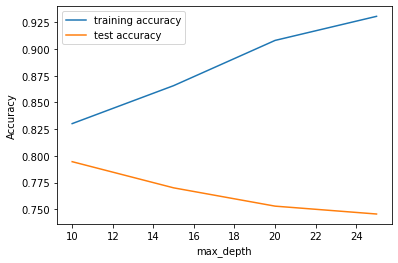

In [279]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [280]:
dt.best_score_

0.7945881825460368

In [281]:
dt.best_estimator_

DecisionTreeClassifier(max_depth=10)

#### Step 9.2: Tuning max_features - with setting max_depth = 10

In [282]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
dt = DecisionTreeClassifier(max_depth=10)


# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
dt.fit(X_train_dt, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=10),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [283]:
# scores of GridSearch CV
scores = dt.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007990,0.005063,0.003208,0.003929,4,{'max_features': 4},0.8072,0.799840,0.787030,0.803843,...,0.798109,0.007365,2,0.825260,0.825495,0.827496,0.823094,0.818091,0.823887,0.003216
1,0.011209,0.003893,0.000000,0.000000,8,{'max_features': 8},0.7952,0.801441,0.788631,0.805444,...,0.798111,0.005765,1,0.827062,0.831299,0.831499,0.824094,0.826696,0.828130,0.002859
2,0.003188,0.003905,0.000000,0.000000,14,{'max_features': 14},NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,0.000000,0.000000,0.000000,20,{'max_features': 20},NaN,NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.001610,0.003220,0.000000,0.000000,24,{'max_features': 24},NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


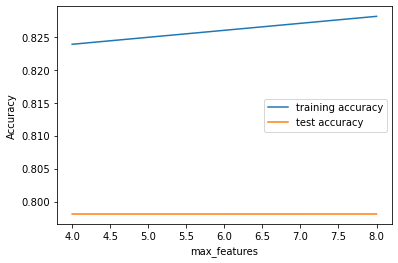

In [284]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [285]:
dt.best_score_

0.7981112570056045

In [286]:
dt.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=8)

Selecting max_features = 4

#### Step 9.3: Tuning min_samples_leaf - with setting max_depth = 10, max_features =4

In [287]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
dt = DecisionTreeClassifier(max_depth=10,max_features=4)


# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
dt.fit(X_train_dt, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, max_features=4),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [288]:
# scores of GridSearch CV
scores = dt.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004800,0.003919,0.000000,0.00000,100,{'min_samples_leaf': 100},0.7984,0.777422,0.771817,0.743795,...,0.775052,0.017973,2,0.789832,0.775465,0.797478,0.732640,0.787472,0.776578,0.023078
1,0.003204,0.003924,0.000000,0.00000,150,{'min_samples_leaf': 150},0.7392,0.779824,0.763010,0.791833,...,0.766255,0.018216,3,0.734388,0.752451,0.790074,0.787272,0.736242,0.760085,0.024189
2,0.006396,0.003198,0.000000,0.00000,200,{'min_samples_leaf': 200},0.7680,0.796637,0.719776,0.739792,...,0.761927,0.028498,4,0.755004,0.783870,0.749049,0.744046,0.785271,0.763448,0.017598
3,0.000000,0.000000,0.003201,0.00392,250,{'min_samples_leaf': 250},0.8000,0.780624,0.755805,0.777422,...,0.780977,0.014896,1,0.789432,0.765659,0.778467,0.773664,0.790674,0.779579,0.009488
4,0.003191,0.003908,0.000000,0.00000,300,{'min_samples_leaf': 300},0.7440,0.791833,0.742994,0.740592,...,0.748640,0.022812,5,0.750000,0.780869,0.773464,0.734040,0.737442,0.755163,0.018881


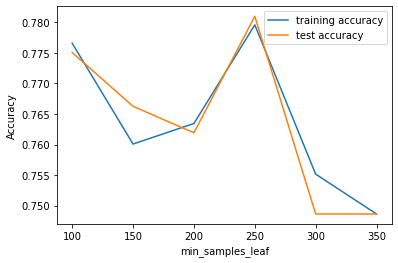

In [289]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [290]:
dt.best_score_

0.7809767814251402

In [291]:
dt.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=4, min_samples_leaf=250)

Selecting min_samples_leaf = 100

#### Step 9.4: Tuning min_samples_split - with setting max_depth = 10, max_features =4, min_sample_leaf = 100

In [292]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(50, 300, 50)}

# instantiate the model
dt = DecisionTreeClassifier(max_depth=10,max_features=4,min_samples_leaf=100)


# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
dt.fit(X_train_dt, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, max_features=4,
                                              min_samples_leaf=100),
             param_grid={'min_samples_split': range(50, 300, 50)},
             return_train_score=True, scoring='accuracy')

In [293]:
# scores of GridSearch CV
scores = dt.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004810,0.003928,0.004802,0.003921,50,{'min_samples_split': 50},0.6816,0.791833,0.766213,0.775821,...,0.761780,0.041354,5,0.695957,0.788673,0.790875,0.773264,0.790674,0.767889,0.036559
1,0.004783,0.003905,0.001603,0.003206,100,{'min_samples_split': 100},0.7768,0.804644,0.755805,0.788631,...,0.781141,0.015944,2,0.775220,0.800280,0.778467,0.781469,0.785671,0.784222,0.008737
2,0.001601,0.003201,0.001599,0.003199,150,{'min_samples_split': 150},0.7952,0.789432,0.762210,0.775821,...,0.777615,0.012948,3,0.790232,0.785872,0.785071,0.774465,0.774265,0.781981,0.006462
3,0.006403,0.003202,0.000000,0.000000,200,{'min_samples_split': 200},0.7880,0.738191,0.765412,0.777422,...,0.768969,0.016974,4,0.780024,0.752051,0.798079,0.773664,0.756654,0.772094,0.016617
4,0.006398,0.003199,0.001598,0.003197,250,{'min_samples_split': 250},0.7824,0.803042,0.761409,0.787830,...,0.784502,0.013443,1,0.781625,0.787873,0.784471,0.784871,0.788873,0.785543,0.002587


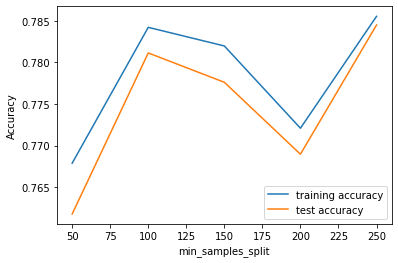

In [294]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [295]:
dt.best_score_

0.7845024179343476

In [296]:
dt.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=4, min_samples_leaf=100,
                       min_samples_split=250)

Selecting min_samples_split = 150

#### <font color=orange> Step 9.5: Fitting the final model with the best parameters obtained.    
    Running the model with tuned parameters:
    setting max_depth = 10 
    max_features = 4 
    min_sample_leaf = 100 
    min_sample_split = 150

In [297]:
# Decision Tree model with the best hyperparameters

dtc = DecisionTreeClassifier(max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=150,
                             max_features=4,
                             random_state=10)

In [298]:
# fit
dt_final=dtc.fit(X_train_dt,y_train)
#Predict on training set
dt_train_predictions = dt_final.predict(X_train_dt)
dt_train_predprob = dt_final.predict_proba(X_train_dt)[:,1]

In [299]:
#lets print some scores
print ("Accuracy :",metrics.roc_auc_score(y_train, dt_train_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train, dt_train_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train, dt_train_predprob))

Accuracy : 0.7793648316088595
Recall/Sensitivity : 0.7498947368421053
AUC Score (Train): 0.8306330201634284


#### <font color=orange> Step 9.6: Running Prediction on Test dataset

In [300]:
#lets predict on test dataset

pred_probs_test = dt_final.predict(X_test)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.7804702323202874
precision score: 0.6970260223048327
Sensitivity/Recall : 0.7545271629778671
Specificity: 0.8064133016627079
False Positive Rate: 0.19358669833729217
Positive predictive value: 0.6970260223048327
Negative Predictive value: 0.8476903870162297
Accuracy : 0.7871545929798357


Probability evalaution 

In [301]:
#lets check with probability cutoff 0.5

y_train_preddt = dt_final.predict_proba(X_train_dt)[:,1]
y_train_preddt_final = pd.DataFrame({'Converted':y_train, 'Converted_Prob':y_train_preddt})
y_train_preddt_final['Converted_Prob'] = y_train_preddt
y_train_preddt_final['predicted'] = y_train_preddt_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_preddt_final.head()

,Converted,Converted_Prob,predicted
6676,1,0.650138,1
6138,1,0.720779,1
8650,1,0.961905,1
3423,0,0.230137,0
6552,0,0.230137,0


In [302]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_preddt_final[i]= y_train_preddt_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_preddt_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6676,1,0.650138,1,1,1,1,1,1,1,1,0,0,0
6138,1,0.720779,1,1,1,1,1,1,1,1,1,0,0
8650,1,0.961905,1,1,1,1,1,1,1,1,1,1,1
3423,0,0.230137,0,1,1,1,0,0,0,0,0,0,0
6552,0,0.230137,0,1,1,1,0,0,0,0,0,0,0


In [303]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_preddt_final.Converted, y_train_preddt_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.489273  0.978947  0.188840
0.2   0.2  0.691803  0.856000  0.591062
0.3   0.3  0.786423  0.749895  0.808835
0.4   0.4  0.786423  0.749895  0.808835
0.5   0.5  0.786423  0.749895  0.808835
0.6   0.6  0.777297  0.613895  0.877551
0.7   0.7  0.747198  0.430737  0.941359
0.8   0.8  0.701409  0.243368  0.982433
0.9   0.9  0.653218  0.090947  0.998192


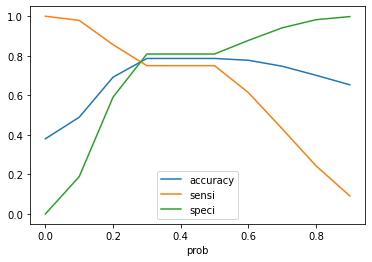

In [304]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Observation: From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [305]:
#apply cutoff probability
y_train_preddt_final['final_predicted'] = y_train_preddt_final.Converted_Prob.map( lambda x: 1 if x > 0.5 else 0)
#lets predict on train dataset with optimal cutoff probability
y_train_preddt = dt_final.predict_proba(X_train_dt)[:,1]
y_train_preddt_final = pd.DataFrame({'Converted':y_train, 'Converted_Prob':y_train_preddt})
y_train_preddt_final['Churn_Prob'] = y_train_preddt
y_train_preddt_final['predicted'] = y_train_preddt_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_preddt_final.head()

,Converted,Converted_Prob,Churn_Prob,predicted
6676,1,0.650138,0.650138,1
6138,1,0.720779,0.720779,1
8650,1,0.961905,0.961905,1
3423,0,0.230137,0.230137,0
6552,0,0.230137,0.230137,0


In [306]:
#lets find out all scores of train dataset

confusion = metrics.confusion_matrix(y_train_preddt_final.Converted, y_train_preddt_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_preddt_final.Converted, y_train_preddt_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_preddt_final.Converted, y_train_preddt_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_train_preddt_final.Converted, y_train_preddt_final.predicted)))

Roc_auc_score : 0.7793648316088595
precision score: 0.7064656882189607
Sensitivity/Recall : 0.7498947368421053
Specificity: 0.8088349263756135
False Positive Rate: 0.19116507362438645
Positive predictive value: 0.7064656882189607
Negative Predictive value: 0.8405369127516779
Accuracy : 0.7864233109189882


In [307]:
#lets predict on test datset with optimal cutoff obtained earlier

y_test_preddt = dt_final.predict_proba(X_test)[:,1]
y_test_preddt_final = pd.DataFrame({'Converted':y_test, 'Converted_Prob':y_test_preddt})
y_test_preddt_final['Converted_Prob'] = y_test_preddt
y_test_preddt_final['predicted'] = y_test_preddt_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_preddt_final.head()

,Converted,Converted_Prob,predicted
7625,0,0.554572,1
5207,1,0.720779,1
2390,1,0.633803,1
4362,0,0.187793,0
1023,0,0.142993,0


In [308]:
#lets find out all scores of test dataset
confusion = metrics.confusion_matrix(y_test_preddt_final.Converted, y_test_preddt_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_preddt_final.Converted, y_test_preddt_final.predicted))
print('precision score :',(metrics.precision_score(y_test_preddt_final.Converted, y_test_preddt_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test_preddt_final.Converted, y_test_preddt_final.predicted)))

Roc_auc_score : 0.7804702323202874
precision score : 0.6970260223048327
Sensitivity/Recall : 0.7545271629778671
Specificity: 0.8064133016627079
False Positive Rate: 0.19358669833729217
Positive predictive value: 0.6970260223048327
Negative Predictive value: 0.8476903870162297
Accuracy : 0.7871545929798357


### **Inference**:
Decision Tree Modeling Stats for Train Dataset:<br>

**Accuracy:** 78.6% <br>
**Sensitivity:** 74.9%<br>
**Specificity:** 80.8%<br>
    
Stats for Test Dataset:<br>

**Accuracy:** 78.7%<br>
**Sensitivity:** 75.4%<br>
**Specificity:** 80.6%

--------------------------------- End of Decision Tree Modelling ---------------------------------<br>
--------------------------------------- End of Assignment ---------------------------------------